In [1]:
### Machine Running library install
from sklearn.neighbors import KNeighborsClassifier


from sklearn.linear_model import LogisticRegression

### 선형, 다중, 다항 회귀모델 라이브러리 정의
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### visualization library
import matplotlib.pyplot as plt

# Definition of the NumPy library
import numpy as np

### Definition of Library (Preprocessing Library)
from sklearn.model_selection import train_test_split

### 오차행렬 및 오차행렬도 라이브러리 정의하기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# - 변환기 모델(클래스) 라이브러리 정의하기
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# 정확도
from sklearn.metrics import accuracy_score
# 정밀도
from sklearn.metrics import precision_score
# 재현율
from sklearn.metrics import recall_score
# f1-score
from sklearn.metrics import f1_score


# - 결정트리 모델(클래스) 라이브러리 정의
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

### 교차검증 및 폴드 사용을 위한 라이브러리 정의
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

import pandas as pd 

import seaborn as sns


### 라이브러리 정의
from scipy.stats import spearmanr

### 라이브러리 정의
from scipy.stats import pearsonr

### 하이퍼파라미터 튜닝 모델(클래스) 정의하기
from sklearn.model_selection import GridSearchCV

plt.rc("font", family="Malgun Gothic")

plt.rcParams["axes.unicode_minus"] = False

### 경고 메시지 없애기
# - 사이킷런 버전에 따라 오류가 아니니 안내(경고)메시지가 자주 나타남
# - 안내(경고) 메시지 없이 실행할 수 있도록 처리
from sklearn import set_config
set_config(display="text")

### 클래스
from Wine_Classes import classification_analysis
from Wine_Classes_feature import classification_analysis_feature

### 와인 전체 특성을 사용한 훈련, 예측, 평가하기

In [2]:
### 와인 전체 데이터셋 읽어들이기
from sklearn.datasets import load_wine

wine = load_wine()

wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)

wine_df["target"] = wine.target

# 클래스 2를 제외한 데이터만 필터링
wine_df_filtered = wine_df[wine_df["target"] != 2]

# 결과 확인
wine_df_filtered

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,12.07,2.16,2.17,21.0,85.0,2.60,2.65,0.37,1.35,2.76,0.86,3.28,378.0,1
126,12.43,1.53,2.29,21.5,86.0,2.74,3.15,0.39,1.77,3.94,0.69,2.84,352.0,1
127,11.79,2.13,2.78,28.5,92.0,2.13,2.24,0.58,1.76,3.00,0.97,2.44,466.0,1
128,12.37,1.63,2.30,24.5,88.0,2.22,2.45,0.40,1.90,2.12,0.89,2.78,342.0,1


In [3]:
"""
<딕셔너리에서 사용하는 key>
 - feature_name : 특성이름
 - data : 특성에 대한 데이터(특성 데이터, 독립변수)
 - target : 종속변수
 - target_names : 종속변수 범주 데이터
                : class_0 : 레드와인
                : class_1 : 화이트와인
                : class_2 : ? (사용안함)

<와인 성분에 포함된 화학조성 특성>
'alcohol' : 알콜도수
'malic_acid' : 말산
'ash' : 회분
'alcalinity_of_ash' : 회분의 알칼리도
'magnesium' : 마그네슘
'total_phenols' : 총 포리페놀
'flavanoids' : 플라보노이드 폴리페놀
'nonflavanoid_phenols' : 비 프라보노이드 폴리페놀
'proanthocyanins' : 프로안토시아닌
'color_intensity' : 색상 강도
'hue' : 색상
'od280/od315_of_diluted_wines' : 희석와인의 비율
'proline : 프롤린
"""

"\n<딕셔너리에서 사용하는 key>\n - feature_name : 특성이름\n - data : 특성에 대한 데이터(특성 데이터, 독립변수)\n - target : 종속변수\n - target_names : 종속변수 범주 데이터\n                : class_0 : 레드와인\n                : class_1 : 화이트와인\n                : class_2 : ? (사용안함)\n\n<와인 성분에 포함된 화학조성 특성>\n'alcohol' : 알콜도수\n'malic_acid' : 말산\n'ash' : 회분\n'alcalinity_of_ash' : 회분의 알칼리도\n'magnesium' : 마그네슘\n'total_phenols' : 총 포리페놀\n'flavanoids' : 플라보노이드 폴리페놀\n'nonflavanoid_phenols' : 비 프라보노이드 폴리페놀\n'proanthocyanins' : 프로안토시아닌\n'color_intensity' : 색상 강도\n'hue' : 색상\n'od280/od315_of_diluted_wines' : 희석와인의 비율\n'proline : 프롤린\n"

In [4]:
"""
- 사용 할 종속변수 범주: class_0, class_1 만 사용
- KNN, 로지스틱리그레이션, 결정트리(DT) 모델 사용
- 각 모델별로 과적합여부, 예측, 평가, 해석
- 최종 모델 선정
- 교차검증 제외, 튜닝모델 / 특성공학 / 스케일링 등 사용
- 최종 모델 선정(특성공학 및 스케일링 별로 모델 성능 평가 후 선정)
- 구글드라이브에 조별 제출: 0조_와인_전체특성사용_분류.ipynb
"""

'\n- 사용 할 종속변수 범주: class_0, class_1 만 사용\n- KNN, 로지스틱리그레이션, 결정트리(DT) 모델 사용\n- 각 모델별로 과적합여부, 예측, 평가, 해석\n- 최종 모델 선정\n- 교차검증 제외, 튜닝모델 / 특성공학 / 스케일링 등 사용\n- 최종 모델 선정(특성공학 및 스케일링 별로 모델 성능 평가 후 선정)\n- 구글드라이브에 조별 제출: 0조_와인_전체특성사용_분류.ipynb\n'

In [5]:
# 데이터 분리하기
X = wine_df_filtered.iloc[:, :-1]
y = wine_df_filtered["target"]

train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=2, random_state=42, stratify=y)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(128, 13) (128,)
(2, 13) (2,)


### 상관관계 검증하기 (스피어만, 피어슨)

In [6]:
data_columns_nm = X.columns
data_columns_nm

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [ ]:
### 1. 스피어만 방식
spearmanr(X[data_columns_nm[0]], y)

for col in data_columns_nm:
    stat, p_value = spearmanr(X[col], y)
    print(f"[{col}] vs class : statistic={stat:.4f}, p_value={p_value:.4f}")
    
    
### (해석)
# - 'hue' : 색상의 경우 유의미 계수는 0.5623로, p-value < 0.05에 따른 유의미 하지 않으며,
# - 나머지 경우에는 모두 p_value < 0.05를 만족하는 유의미한 것으로 나타남
    

[alcohol] vs class : statistic=-0.8174, p_value=0.0000
[malic_acid] vs class : statistic=-0.2096, p_value=0.0167
[ash] vs class : statistic=-0.3686, p_value=0.0000
[alcalinity_of_ash] vs class : statistic=0.5035, p_value=0.0000
[magnesium] vs class : statistic=-0.5303, p_value=0.0000
[total_phenols] vs class : statistic=-0.5401, p_value=0.0000
[flavanoids] vs class : statistic=-0.6650, p_value=0.0000
[nonflavanoid_phenols] vs class : statistic=0.3199, p_value=0.0002
[proanthocyanins] vs class : statistic=-0.3033, p_value=0.0005
[color_intensity] vs class : statistic=-0.7706, p_value=0.0000
[hue] vs class : statistic=-0.0513, p_value=0.5623
[od280/od315_of_diluted_wines] vs class : statistic=-0.3634, p_value=0.0000
[proline] vs class : statistic=-0.8394, p_value=0.0000


In [ ]:
### 2. 피어슨 방식
pearsonr(X[data_columns_nm[0]], y)

for col in data_columns_nm:
    stat, p_value = pearsonr(X[col], y)
    print(f"[{col}] vs class : statistic={stat:.4f}, p_value={p_value:.4f}")
    
### (해석)
# - 'hue' : 색상 그리고 'malic_acid' : 말산의 경우 유의미 계수는  p-value < 0.05에 만족하지 않아 유의미 하지 않으며,
# - 나머지 경우에는 모두 p_value < 0.05를 만족하는 유의미한 것으로 나타남

[alcohol] vs class : statistic=-0.8244, p_value=0.0000
[malic_acid] vs class : statistic=-0.0443, p_value=0.6167
[ash] vs class : statistic=-0.3545, p_value=0.0000
[alcalinity_of_ash] vs class : statistic=0.4704, p_value=0.0000
[magnesium] vs class : statistic=-0.3831, p_value=0.0000
[total_phenols] vs class : statistic=-0.5327, p_value=0.0000
[flavanoids] vs class : statistic=-0.6107, p_value=0.0000
[nonflavanoid_phenols] vs class : statistic=0.3375, p_value=0.0001
[proanthocyanins] vs class : statistic=-0.2492, p_value=0.0042
[color_intensity] vs class : statistic=-0.7506, p_value=0.0000
[hue] vs class : statistic=-0.0170, p_value=0.8474
[od280/od315_of_diluted_wines] vs class : statistic=-0.3917, p_value=0.0000
[proline] vs class : statistic=-0.8453, p_value=0.0000


### 샘플링

훈련정확도: 0.9375, 테스트정확도: 1.0, 과적합여부: -0.0625
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [1 0]
실제정답: [1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


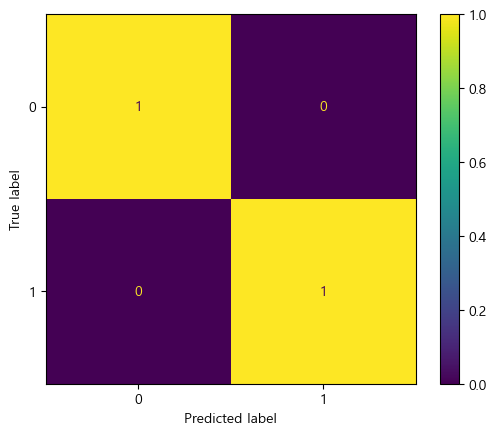


훈련정확도: 0.9921875, 테스트정확도: 1.0, 과적합여부: -0.0078125
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [1 0]
실제정답: [1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


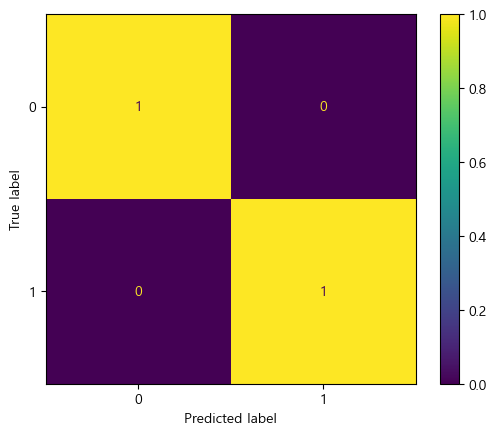


훈련정확도: 0.9765625, 테스트정확도: 1.0, 과적합여부: -0.0234375
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [1 0]
실제정답: [1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


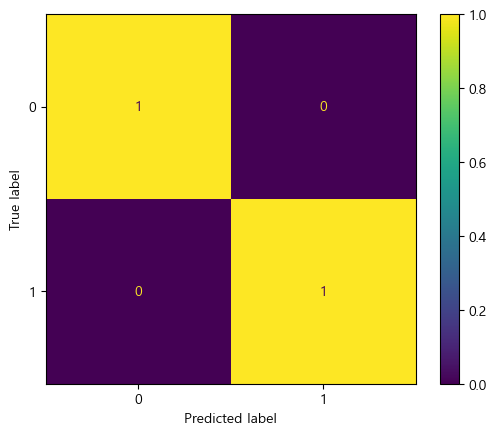

In [9]:
# 훈련 for 문 돌리기
kn = KNeighborsClassifier()
lr = LogisticRegression(random_state=42, max_iter=1000)
dt = DecisionTreeClassifier(max_depth=12, min_samples_split=10, min_samples_leaf=5, random_state=42)

models = [kn, lr, dt]

# 훈련 및 평가 반복문
for model in models:
    model.fit(train_input, train_target)
    
    # 정확도 및 과적합 여부 판단
    train_score = model.score(train_input, train_target)
    test_score = model.score(test_input, test_target)
    print(f"훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")
    
    if train_score - test_score > 0.1:
        print("과대적합으로 판단됩니다.")
    
    elif train_score - test_score < 0:
        print("과소적합이 발생하였습니다.")
        
    else:
        print("사용가능한 과적합 상태입니다.")
        
    # 테스트 데이터로 예측하기
    test_pred = model.predict(test_input)
    
    # test_pred와 test_target 비교하기
    correct_prediction = test_pred == test_target  
    if correct_prediction.all():
        print("모든 예측이 정확합니다.")
        
    else:
        correct_indices = [i for i in range(len(test_pred)) if not correct_prediction[i]]
        print(f"예측에 실패한 인덱스: {correct_indices}")
        
    print(f"예측결과: {test_pred}")
    print(f"실제정답: {test_target.values}")
    
    ### 정확도
    acc = accuracy_score(test_target, test_pred)

    ### 정밀도
    pre = precision_score(test_target, test_pred)

    ### 재현율
    rec = recall_score(test_target, test_pred)

    ### f1-score
    f1 = f1_score(test_target, test_pred)

    print(f"정확도:{acc:.4f}, 정밀도:{pre:.4f}, 재현율:{rec:.4f}, f1-score:{f1:.4f}")
    
    cm = confusion_matrix(test_target, test_pred, labels=model.classes_)
    dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    dist.plot()
    plt.show()
    print("")

### 특성, 스케일링 미적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9615384615384616, 과적합여부: 0.0
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


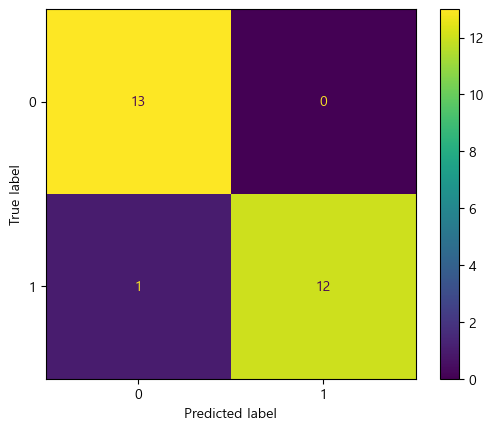


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 1.0, 테스트정확도: 1.0, 과적합여부: 0.0
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


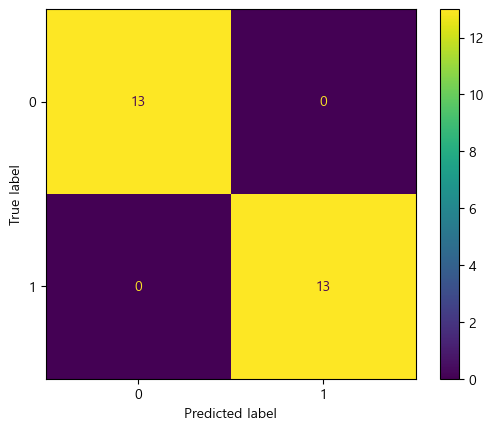


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
훈련정확도: 0.9903846153846154, 테스트정확도: 1.0, 과적합여부: -0.009615384615384581
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


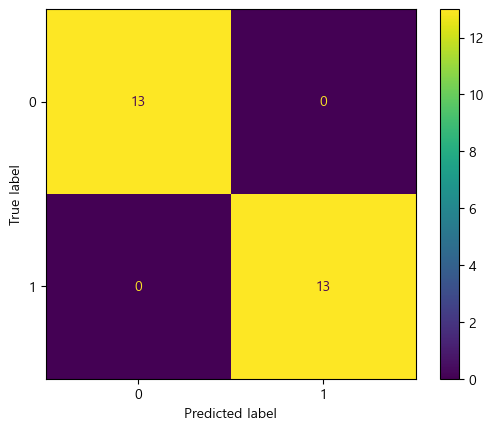

In [10]:
Wine_Noset= classification_analysis(
                data=wine_df_filtered, 
                target_column="target",
                test_size=0.2,
                random_state=42, 
                poly_degree=1, 
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_Noset)
classification_analysis.train_and_evaluate(Wine_Noset)

###(해석)
# - KneighborsClassifier, LogisticRegression은 둘 다 모두 과소적합 상태로, 사용이 불가능하다고 판단됩니다.
# - DecisionTreeClassifier는
#   훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
#   사용가능한 과적합 상태로 판단됩니다.
# - 예측과 실제 정답과의 오차 범위도 매우 적은 걸로 나타납니다.
# - 예측에 실패한 인덱스: [13]
# - 예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
# - 실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
# - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630
# - plot을 확인하여볼때 오차행렬의 상태는 진실 양성(TP), 진실 음성(TN)이며,
#   과적합이 일어나진 않은 일반화된 모델로, 정확도는 약 0.9615로 좋은 성능을 보이고 있으며,
#   재현율이 약 1.0으로 부정적 오류가 낮으며,
# - f1-score는 약 0.960으로 전반적인 오류가 낮은 모델로 판단됩니다.

### 특성공학 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9615384615384616, 과적합여부: 0.0
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


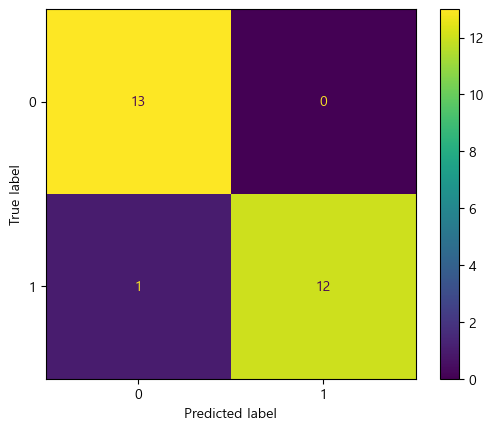


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 1.0, 테스트정확도: 1.0, 과적합여부: 0.0
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


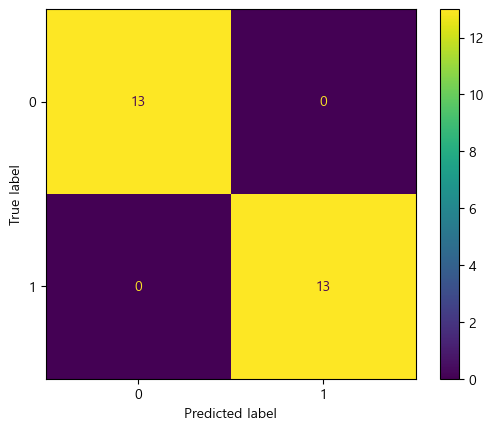


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}
훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


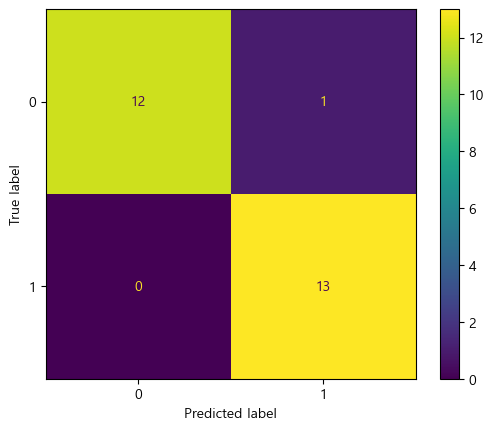

In [11]:
Wine_poly= classification_analysis(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=2, 
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_poly)
classification_analysis.train_and_evaluate(Wine_poly)

###(해석)
# - KneighborsClassifier, LogisticRegression은 둘 다 모두 과소적합 상태로, 사용이 불가능하다고 판단됩니다.
# - DecisionTreeClassifier는
#   훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
#   사용가능한 과적합 상태로 판단됩니다.
# - 예측과 실제 정답과의 오차 범위도 매우 적은 걸로 나타납니다.
# - 예측에 실패한 인덱스: [13]
#   예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
#   실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
# - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630
# - plot을 확인하여볼때 오차행렬의 상태는 진실 양성(TP), 진실 음성(TN)이며,
#   과적합이 일어나진 않은 일반화된 모델로, 정확도는 약 0.9615로 좋은 성능을 보이고 있으며,
#   재현율이 약 1.0으로 부정적 오류가 낮으며,
# - f1-score는 약 0.960으로 전반적인 오류가 낮은 모델로 판단됩니다.

### StandardScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9615384615384616, 과적합여부: 0.0
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


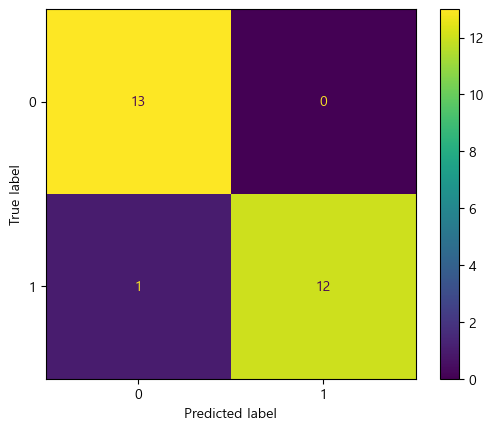


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 1.0, 테스트정확도: 1.0, 과적합여부: 0.0
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


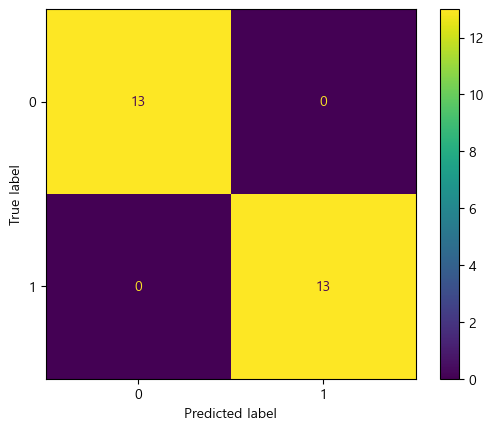


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


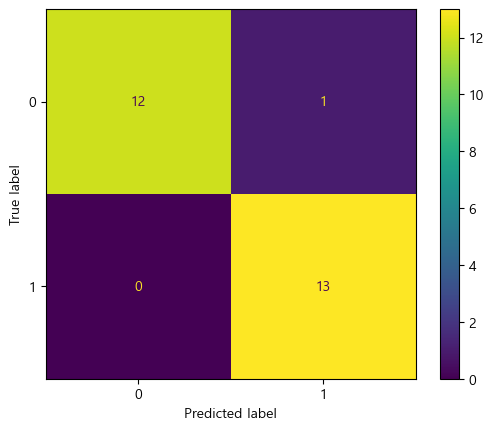

In [12]:
Wine_ss = classification_analysis(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=1, 
                scaler_type= "standard",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_ss)
classification_analysis.train_and_evaluate(Wine_ss)

###(해석)
# - KneighborsClassifier, LogisticRegression, DecisionTreeClassifier은 세 모델 모두 과소적합 상태로, 사용이 불가능하다고 판단됩니다.



### MinMaxScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 9}
훈련정확도: 0.9903846153846154, 테스트정확도: 0.9230769230769231, 과적합여부: 0.06730769230769229
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [8, 10]
예측결과: [0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:1.0000, 재현율:0.8462, f1-score:0.9167


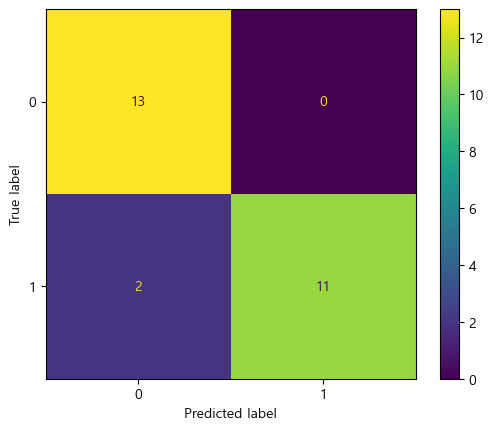


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 1.0, 테스트정확도: 1.0, 과적합여부: 0.0
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


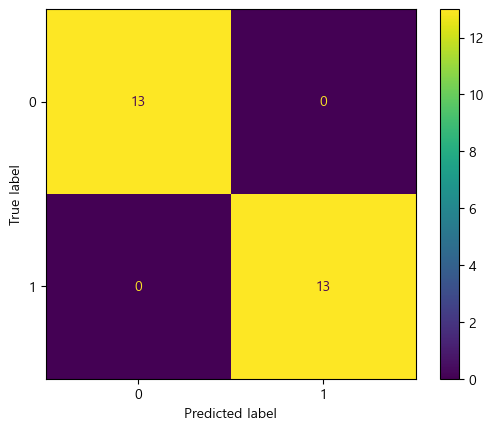


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


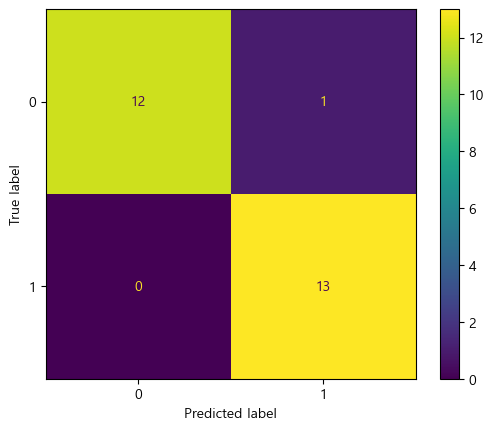

In [13]:
Wine_mm = classification_analysis(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=1, 
                scaler_type= "minmax",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_mm)
classification_analysis.train_and_evaluate(Wine_mm)

###(해석)
# - KneighborsClassifier, LogisticRegression은 둘 다 모두 과소적합 상태로, 사용이 불가능하다고 판단됩니다.
# - DecisionTreeClassifier는 훈련정확도가 너무 높다고 판단하여 사용이 불가하다고 예측됩니다.


### RobustScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 7}
훈련정확도: 0.9519230769230769, 테스트정확도: 0.8846153846153846, 과적합여부: 0.06730769230769229
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [6, 8, 10]
예측결과: [0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.8846, 정밀도:1.0000, 재현율:0.7692, f1-score:0.8696


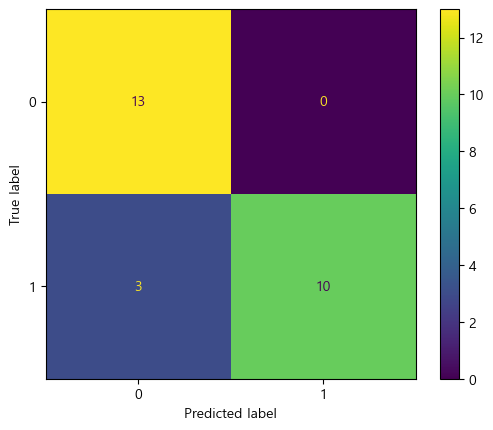


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 1}
훈련정확도: 1.0, 테스트정확도: 1.0, 과적합여부: 0.0
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


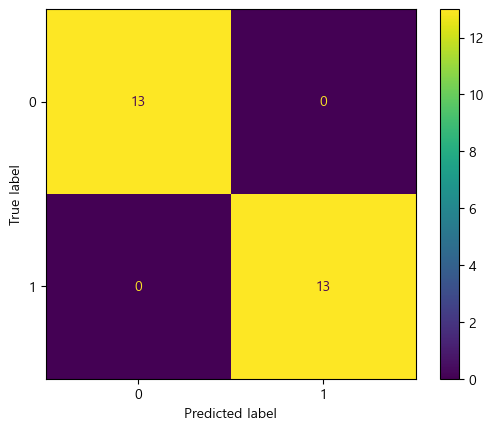


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


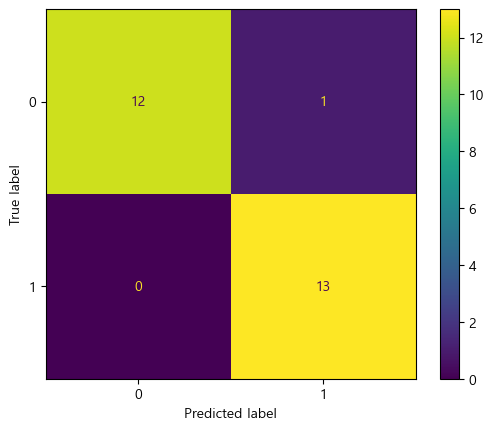

In [14]:
Wine_rb = classification_analysis(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=1, 
                scaler_type= "robust",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_rb)
classification_analysis.train_and_evaluate(Wine_rb)

###(해석)
# - LogisticRegression은 둘 다 모두 과소적합 상태로, 사용이 불가능하다고 판단됩니다.
# - KNeighborsClassifier와 DecisionTreeClassifier 를 비교하였을 때,
#  - KNeighborsClassifier는 
#    훈련정확도: 0.9519230769230769, 테스트정확도: 0.8846153846153846, 과적합여부: 0.06730769230769229
#    사용가능한 과적합 상태입니다.
#    예측에 실패한 인덱스: [6, 8, 10]
#    예측결과: [0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
#    실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
#  - DecisionTreeClassifier는
#    훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
#    사용가능한 과적합 상태로 판단됩니다.
#    예측에 실패한 인덱스: [13]
#    예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
#    실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
#  - 훈련정확도는 두모델 둘 다 우수한 상태이나, 테스트정확도와 과적합여부에서
#    DecisionTreeClassifier가 조금 더 우수판단이 되며, 이 모델로 진행을 합니다.
# - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630
# - plot을 확인하여볼때 오차행렬의 상태는 진실 양성(TP), 진실 음성(TN)이며,
#   과적합이 일어나진 않은 일반화된 모델로, 정확도는 약 0.9615로 좋은 성능을 보이고 있으며,
#   재현율이 약 1.0으로 부정적 오류가 낮으며,
# - f1-score는 약 0.960으로 전반적인 오류가 낮은 모델로 판단됩니다.

### 특성공학, StandardScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9615384615384616, 과적합여부: 0.0
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


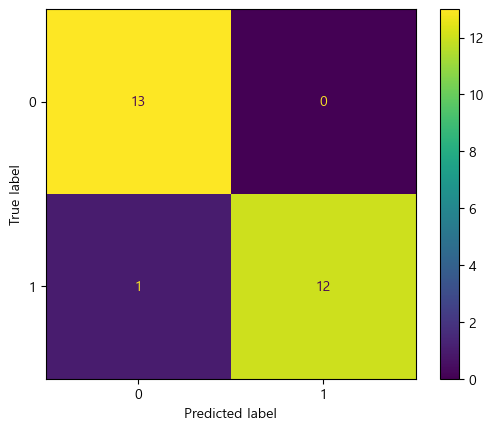


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 1.0, 테스트정확도: 1.0, 과적합여부: 0.0
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


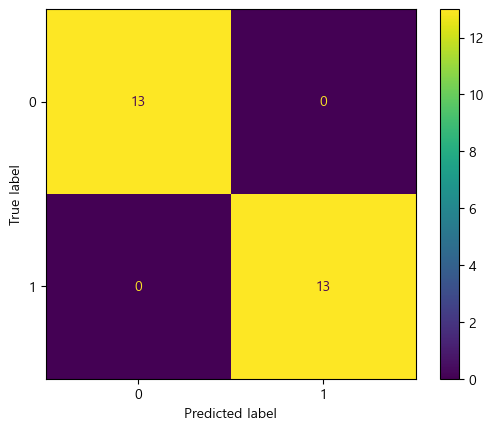


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


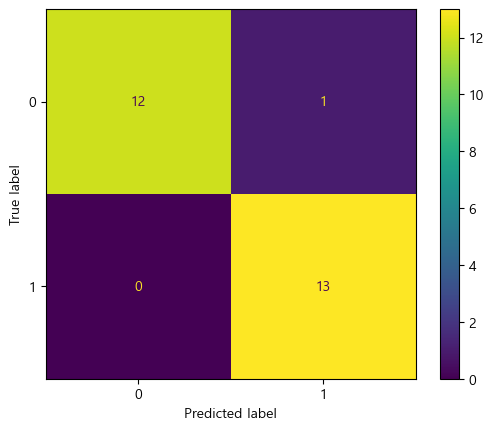

In [15]:
Wine_polyss = classification_analysis(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=2, 
                scaler_type= "standard",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_polyss)
classification_analysis.train_and_evaluate(Wine_polyss)

###(해석)
# - KneighborsClassifier, LogisticRegression은 둘 다 모두 과소적합 상태로, 사용이 불가능하다고 판단됩니다.
# - DecisionTreeClassifier는
#   훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
#   사용가능한 과적합 상태로 판단됩니다.
# - 예측과 실제 정답과의 오차 범위도 매우 적은 걸로 나타납니다.
# - 예측에 실패한 인덱스: [13]
#   예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
#   실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
# - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630
# - plot을 확인하여볼때 오차행렬의 상태는 진실 양성(TP), 진실 음성(TN)이며,
#   과적합이 일어나진 않은 일반화된 모델로, 정확도는 약 0.9615로 좋은 성능을 보이고 있으며,
#   재현율이 약 1.0으로 부정적 오류가 낮으며,
# - f1-score는 약 0.960으로 전반적인 오류가 낮은 모델로 판단됩니다.

### 특성공학, MinMaxScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 9}
훈련정확도: 0.9903846153846154, 테스트정확도: 0.9230769230769231, 과적합여부: 0.06730769230769229
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [8, 10]
예측결과: [0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:1.0000, 재현율:0.8462, f1-score:0.9167


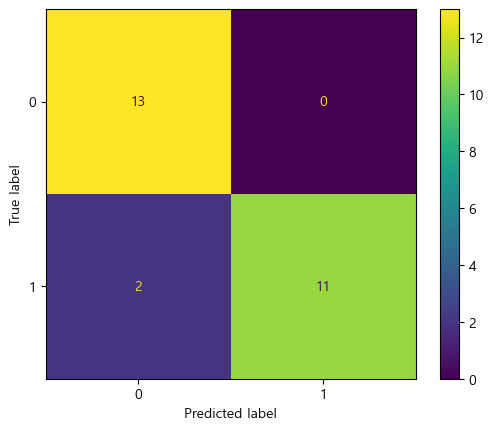


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 1.0, 테스트정확도: 1.0, 과적합여부: 0.0
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


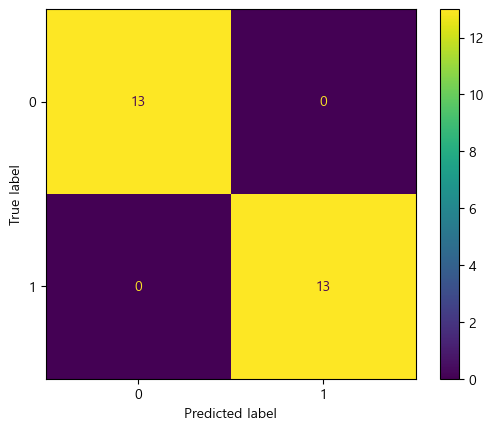


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


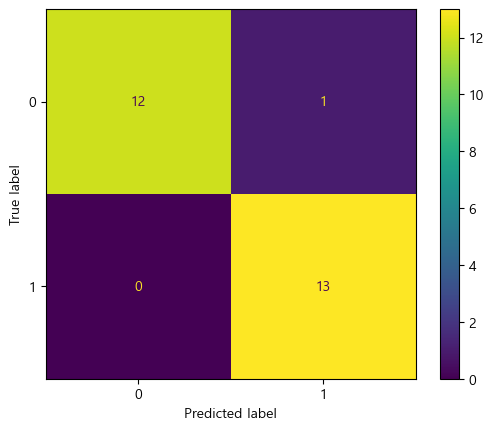

In [16]:
Wine_polymm = classification_analysis(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=2, 
                scaler_type= "minmax",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_polymm)
classification_analysis.train_and_evaluate(Wine_polymm)

###(해석)
# 모델: KNeighborsClassifier
# Fitting 5 folds for each of 4 candidates, totalling 20 fits
# 최적 파라미터: {'n_neighbors': 9}
# 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9230769230769231, 과적합여부: 0.06730769230769229
# 사용가능한 과적합 상태입니다.
# 예측에 실패한 인덱스: [8, 10]
# 예측결과: [0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
# 실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
# 정확도:0.9231, 정밀도:1.0000, 재현율:0.8462, f1-score:0.9167

### 특성공학, RobustScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 7}
훈련정확도: 0.9519230769230769, 테스트정확도: 0.8846153846153846, 과적합여부: 0.06730769230769229
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [6, 8, 10]
예측결과: [0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.8846, 정밀도:1.0000, 재현율:0.7692, f1-score:0.8696


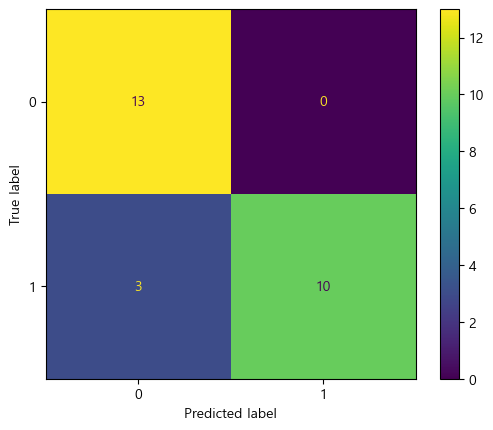


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 1}
훈련정확도: 1.0, 테스트정확도: 1.0, 과적합여부: 0.0
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


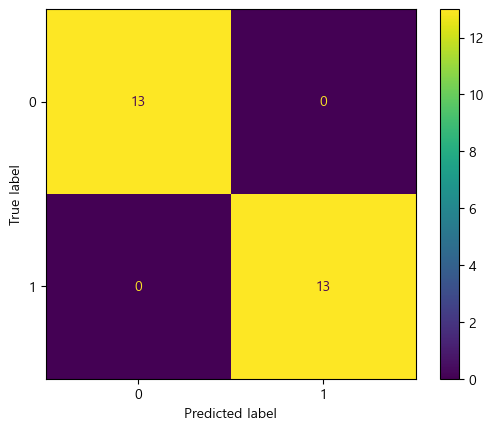


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


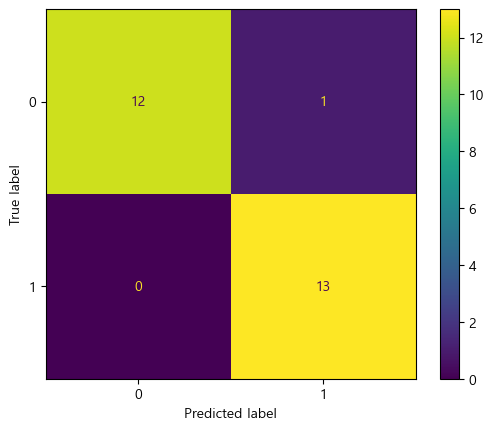

In [17]:
Wine_polyrb = classification_analysis(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=2, 
                scaler_type= "robust",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_polyrb)
classification_analysis.train_and_evaluate(Wine_polyrb)

###(해석)
# - LogisticRegression은 과소적합 상태로, 사용이 불가능하다고 판단됩니다.
# - KNeighborsClassifier와 DecisionTreeClassifier 를 비교하였을 때,
#  - KNeighborsClassifier는 
#    훈련정확도: 0.9519230769230769, 테스트정확도: 0.8846153846153846, 과적합여부: 0.06730769230769229
#    사용가능한 과적합 상태입니다.
#    예측에 실패한 인덱스: [6, 8, 10]
#    예측결과: [0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
#    실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
#  - DecisionTreeClassifier는
#    훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
#    사용가능한 과적합 상태로 판단됩니다.
#    예측에 실패한 인덱스: [13]
#    예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
#    실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
#  - 훈련정확도는 두모델 둘 다 우수한 상태이나, 테스트정확도와 과적합여부에서
#    DecisionTreeClassifier가 조금 더 우수판단이 되며, 이 모델로 진행을 합니다.
# - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630
# - plot을 확인하여볼때 오차행렬의 상태는 진실 양성(TP), 진실 음성(TN)이며,
#   과적합이 일어나진 않은 일반화된 모델로, 정확도는 약 0.9615로 좋은 성능을 보이고 있으며,
#   재현율이 약 1.0으로 부정적 오류가 낮으며,
# - f1-score는 약 0.960으로 전반적인 오류가 낮은 모델로 판단됩니다.

### 상관관계분석

In [18]:
### 1. 상관관계 매트릭스 표
correlation_matrix = wine_df_filtered.corr()
correlation_matrix

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.021014,0.190818,-0.461771,0.330544,0.485061,0.543729,-0.301314,0.190869,0.741935,0.026162,0.290491,0.756168,-0.824399
malic_acid,0.021014,1.000000,0.121625,0.141753,-0.016360,0.030038,0.057852,0.055669,0.136454,-0.108202,-0.408645,0.166457,-0.107553,-0.044302
ash,0.190818,0.121625,1.000000,0.369136,0.306593,0.254490,0.377025,0.179396,0.077778,0.253347,0.041164,0.214496,0.304101,-0.354548
alcalinity_of_ash,-0.461771,0.141753,0.369136,1.000000,-0.123546,-0.228873,-0.180189,0.335042,-0.096965,-0.433335,-0.035805,-0.000632,-0.427021,0.470437
magnesium,0.330544,-0.016360,0.306593,-0.123546,1.000000,0.304089,0.255309,-0.212922,0.278018,0.345495,0.071684,0.130838,0.426982,-0.383085
total_phenols,0.485061,0.030038,0.254490,-0.228873,0.304089,1.000000,0.846509,-0.444721,0.444117,0.590428,-0.008302,0.494673,0.506179,-0.532692
flavanoids,0.543729,0.057852,0.377025,-0.180189,0.255309,0.846509,1.000000,-0.358804,0.542889,0.707064,-0.006622,0.537528,0.545781,-0.610730
nonflavanoid_phenols,-0.301314,0.055669,0.179396,0.335042,-0.212922,-0.444721,-0.358804,1.000000,-0.337243,-0.280354,0.051340,-0.468611,-0.330049,0.337489
proanthocyanins,0.190869,0.136454,0.077778,-0.096965,0.278018,0.444117,0.542889,-0.337243,1.000000,0.272754,-0.010739,0.342529,0.274927,-0.249205
color_intensity,0.741935,-0.108202,0.253347,-0.433335,0.345495,0.590428,0.707064,-0.280354,0.272754,1.000000,0.009784,0.208163,0.775315,-0.750613


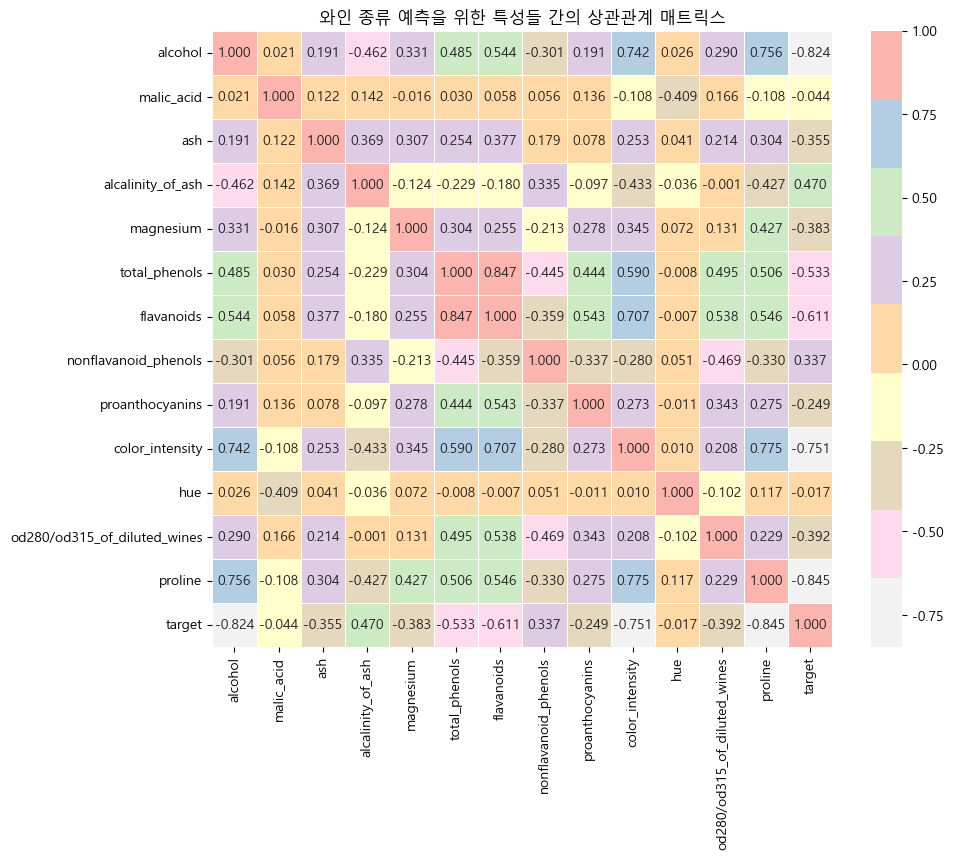

In [19]:
### 2. 상관관계도(히트맵) 그리기
plt.figure(figsize=(10,8))
plt.title("와인 종류 예측을 위한 특성들 간의 상관관계 매트릭스")

sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="Pastel1_r", linewidths=0.5)

plt.show()

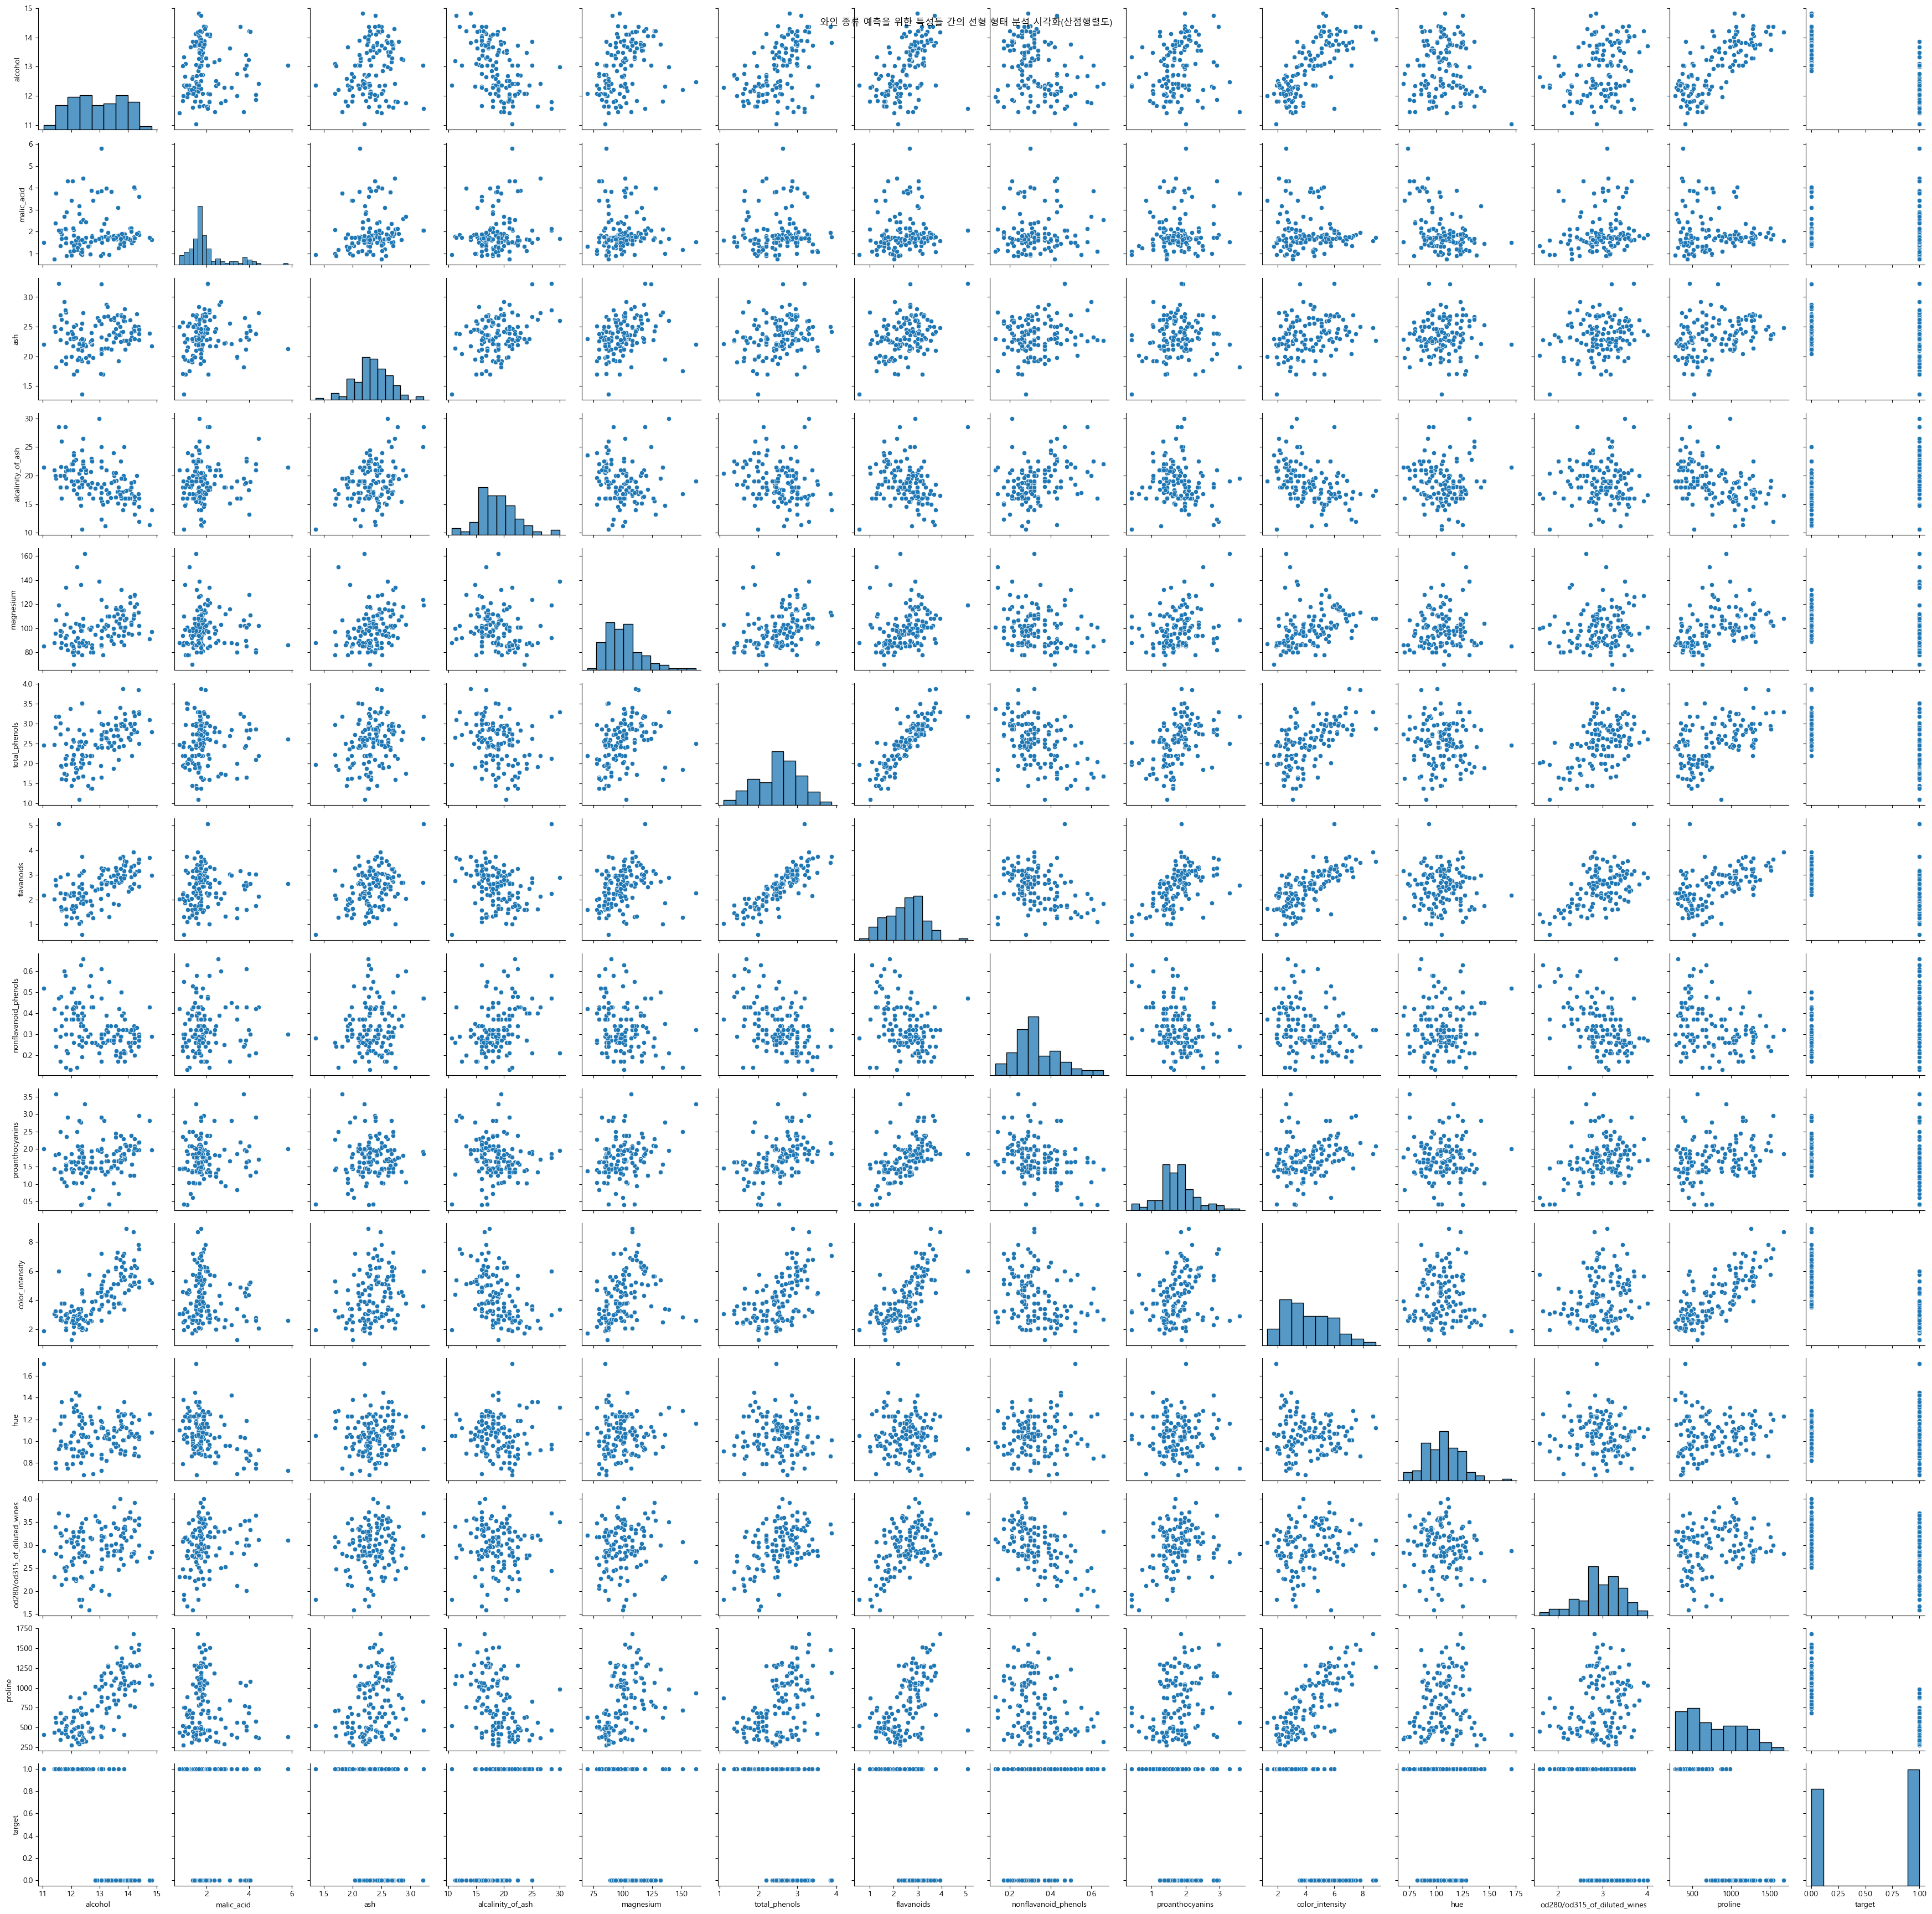

In [20]:
### 3. 상관행렬도(혼동행렬도) 산점도 그리기
sns.pairplot(wine_df_filtered)
plt.suptitle("와인 종류 예측을 위한 특성들 간의 선형 형태 분석 시각화(산점행렬도)")
plt.tight_layout()
plt.show()

# ### (해석)
# # 종속변수를 기준으로 다른 특성들과의 산점도 분포를 확인한 결과
# # - 수평적 형태를 나타내고 있음
# # - 따라서, 분류분석으로 진행

### 특성중요도

In [21]:
### 특성중요도
dt.feature_importances_

array([0.02054536, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.09914795,
       0.        , 0.        , 0.88030669])

### 특성중요도만으로 샘플링

In [22]:
# 데이터 분리하기
X = wine_df_filtered.iloc[:, [0, 9, 12]]
y = wine_df_filtered["target"]

train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=2, random_state=42, stratify=y)

print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(128, 3) (128,)
(2, 3) (2,)


훈련정확도: 0.9375, 테스트정확도: 1.0, 과적합여부: -0.0625
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [1 0]
실제정답: [1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


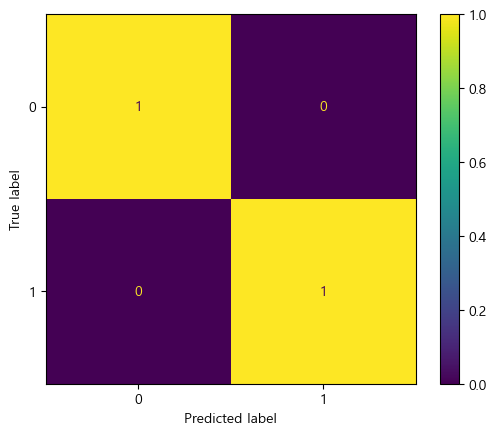


훈련정확도: 0.9765625, 테스트정확도: 1.0, 과적합여부: -0.0234375
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [1 0]
실제정답: [1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


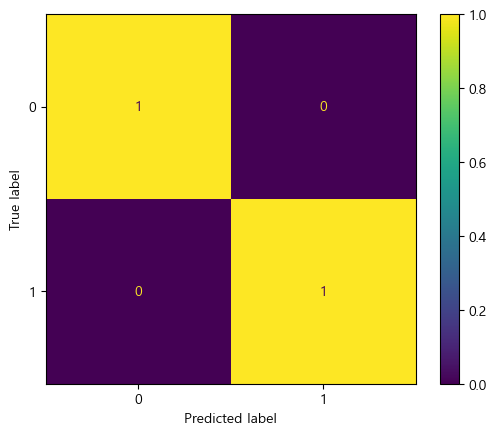


훈련정확도: 0.9765625, 테스트정확도: 1.0, 과적합여부: -0.0234375
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [1 0]
실제정답: [1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


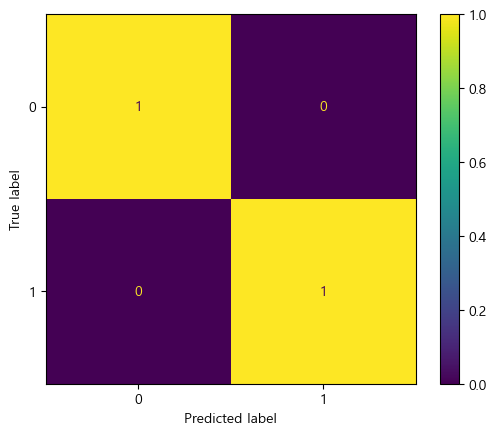

In [23]:
# 훈련 for 문 돌리기
kn = KNeighborsClassifier()
lr = LogisticRegression(random_state=42, max_iter=1000)
dt = DecisionTreeClassifier(max_depth=12, min_samples_split=10, min_samples_leaf=5, random_state=42)

models = [kn, lr, dt]

# 훈련 및 평가 반복문
for model in models:
    model.fit(train_input, train_target)
    
    # 정확도 및 과적합 여부 판단
    train_score = model.score(train_input, train_target)
    test_score = model.score(test_input, test_target)
    print(f"훈련정확도: {train_score}, 테스트정확도: {test_score}, 과적합여부: {train_score - test_score}")
    
    if train_score - test_score > 0.1:
        print("과대적합으로 판단됩니다.")
    
    elif train_score - test_score < 0:
        print("과소적합이 발생하였습니다.")
        
    else:
        print("사용가능한 과적합 상태입니다.")
        
    # 테스트 데이터로 예측하기
    test_pred = model.predict(test_input)
    
    # test_pred와 test_target 비교하기
    correct_prediction = test_pred == test_target  
    if correct_prediction.all():
        print("모든 예측이 정확합니다.")
        
    else:
        correct_indices = [i for i in range(len(test_pred)) if not correct_prediction[i]]
        print(f"예측에 실패한 인덱스: {correct_indices}")
        
    print(f"예측결과: {test_pred}")
    print(f"실제정답: {test_target.values}")
    
    ### 정확도
    acc = accuracy_score(test_target, test_pred)

    ### 정밀도
    pre = precision_score(test_target, test_pred)

    ### 재현율
    rec = recall_score(test_target, test_pred)

    ### f1-score
    f1 = f1_score(test_target, test_pred)

    print(f"정확도:{acc:.4f}, 정밀도:{pre:.4f}, 재현율:{rec:.4f}, f1-score:{f1:.4f}")
    
    cm = confusion_matrix(test_target, test_pred, labels=model.classes_)
    dist = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    dist.plot()
    plt.show()
    print("")

### 특성, 스케일링 미적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9519230769230769, 테스트정확도: 0.9615384615384616, 과적합여부: -0.009615384615384692
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


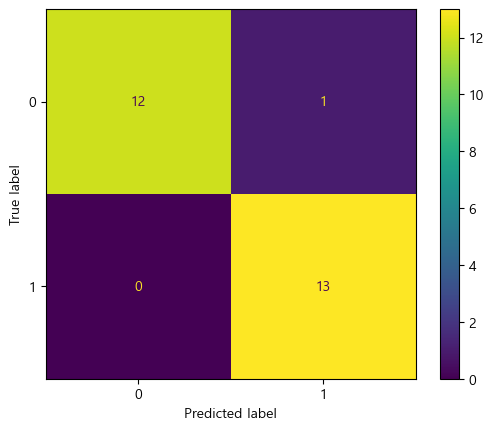


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 1}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9615384615384616, 과적합여부: 0.0
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


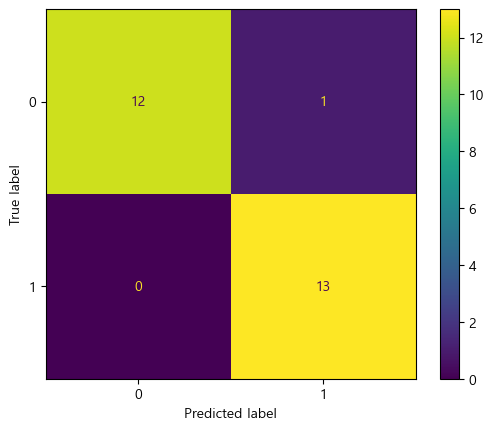


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [8]
예측결과: [0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


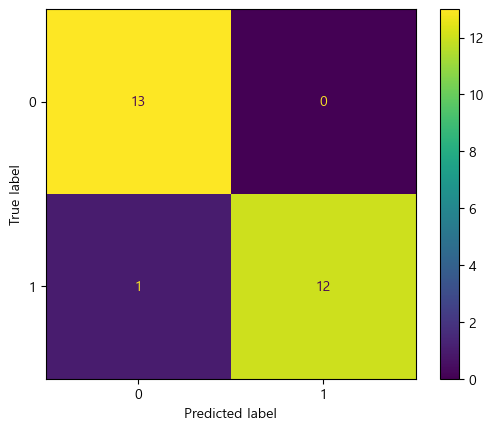

In [24]:
Wine_Noset= classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target",
                test_size=0.2,
                random_state=42, 
                poly_degree=1, 
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_Noset)
classification_analysis.train_and_evaluate(Wine_Noset)

### 특성공학 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9615384615384616, 과적합여부: 0.0
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


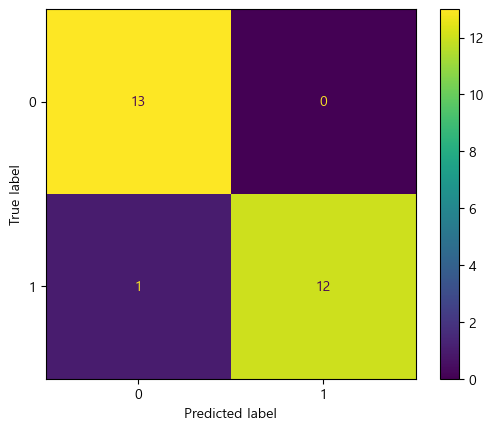


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 1.0, 테스트정확도: 1.0, 과적합여부: 0.0
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


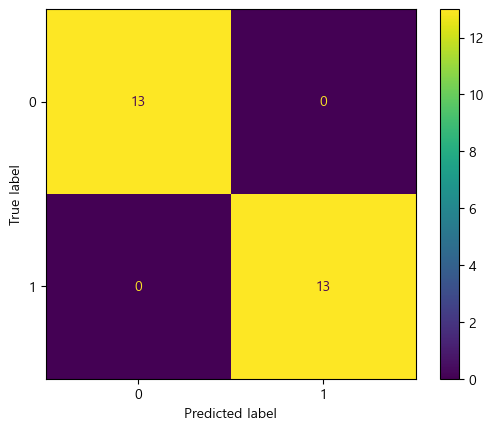


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
훈련정확도: 1.0, 테스트정확도: 1.0, 과적합여부: 0.0
과소적합이 발생하였습니다.
모든 예측이 정확합니다.
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:1.0000, 정밀도:1.0000, 재현율:1.0000, f1-score:1.0000


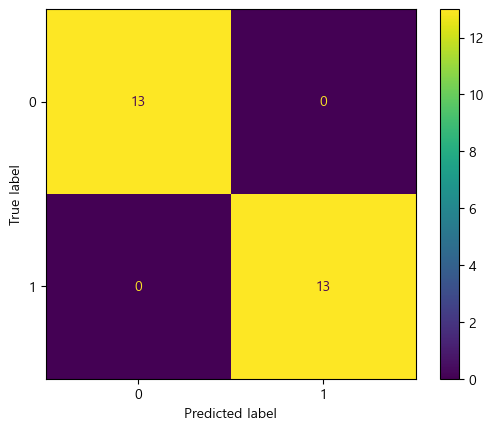

In [25]:
Wine_poly= classification_analysis(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=2, 
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_poly)
classification_analysis.train_and_evaluate(Wine_poly)

### StandardScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9519230769230769, 테스트정확도: 0.9615384615384616, 과적합여부: -0.009615384615384692
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


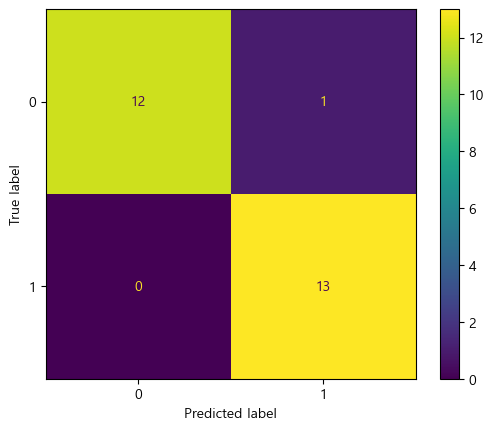


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 1}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9615384615384616, 과적합여부: 0.0
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


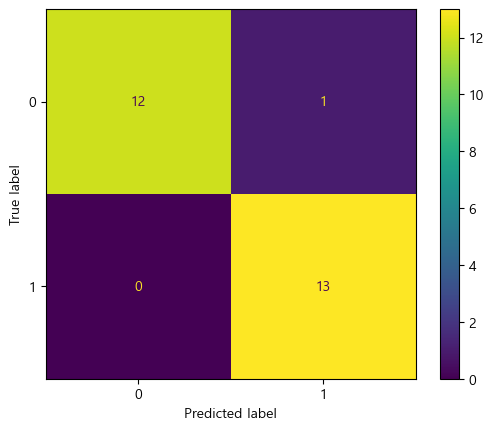


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [8]
예측결과: [0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


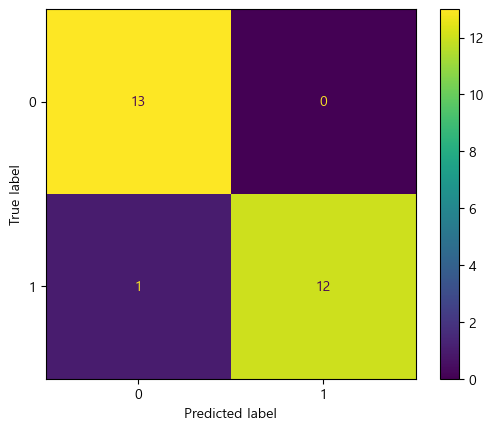

In [26]:
Wine_ss = classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=1, 
                scaler_type= "standard",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_ss)
classification_analysis.train_and_evaluate(Wine_ss)

### MinMaxScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 9}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [10, 13]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231


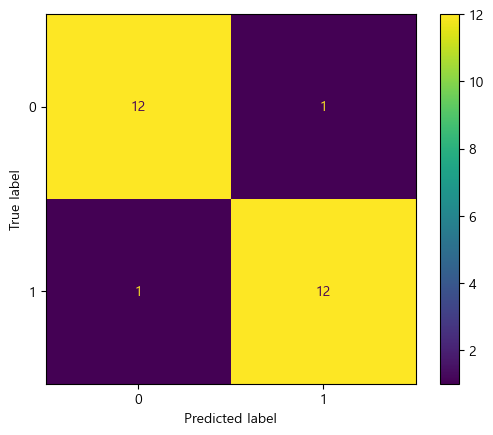


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 0.9519230769230769, 테스트정확도: 0.9615384615384616, 과적합여부: -0.009615384615384692
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


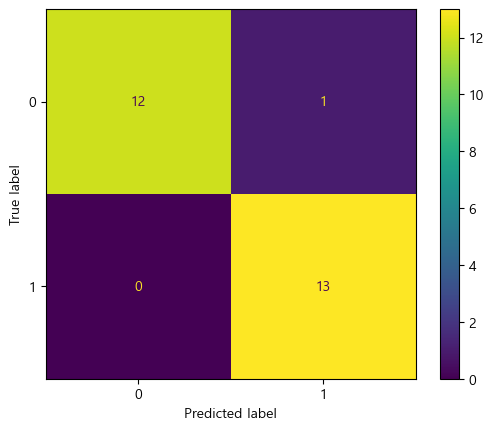


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [8]
예측결과: [0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


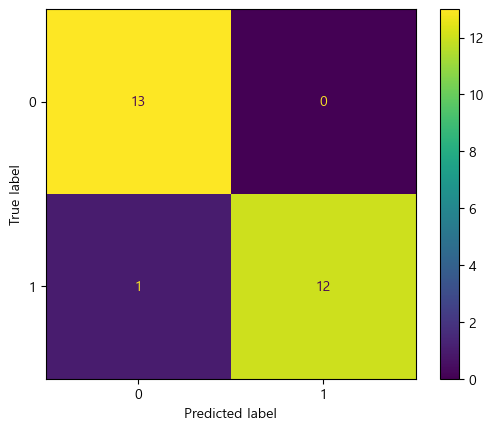

In [27]:
Wine_mm = classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=1, 
                scaler_type= "minmax",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_mm)
classification_analysis.train_and_evaluate(Wine_mm)

### RobustScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9519230769230769, 테스트정확도: 0.9615384615384616, 과적합여부: -0.009615384615384692
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


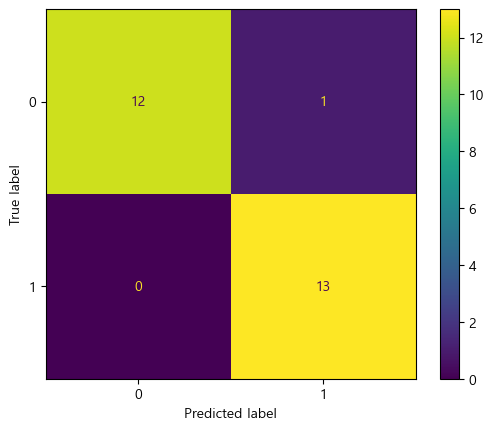


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9615384615384616, 과적합여부: 0.0
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


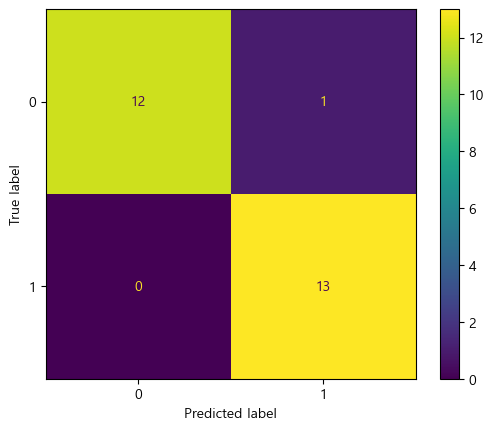


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [8]
예측결과: [0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


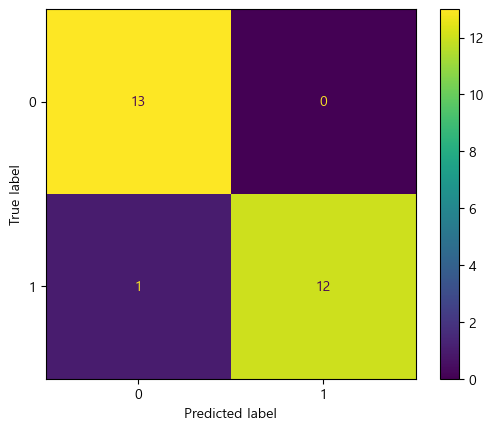

In [28]:
Wine_rb = classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=1, 
                scaler_type= "robust",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_rb)
classification_analysis.train_and_evaluate(Wine_rb)

### 특성공학, StandardScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9519230769230769, 테스트정확도: 0.9615384615384616, 과적합여부: -0.009615384615384692
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


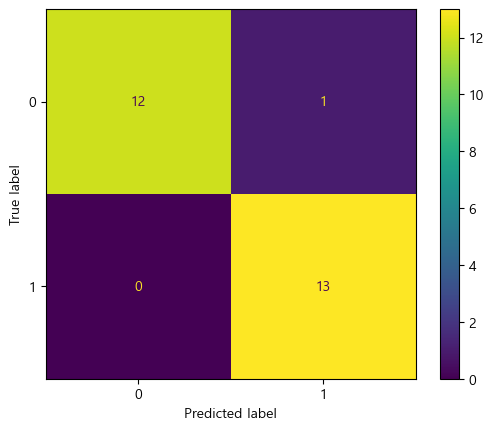


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 1}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9615384615384616, 과적합여부: 0.0
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


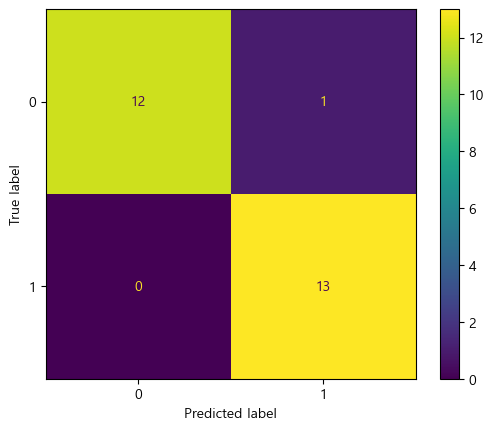


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [8]
예측결과: [0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


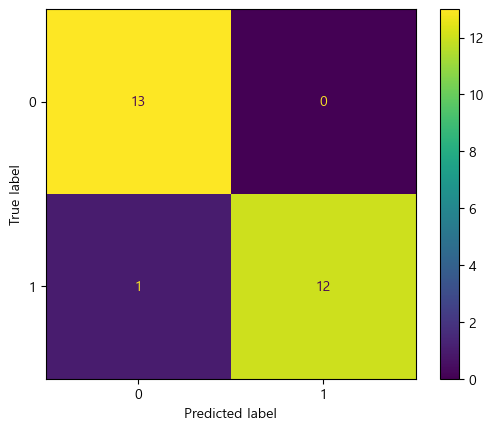

In [29]:
Wine_polyss = classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=2, 
                scaler_type= "standard",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_polyss)
classification_analysis.train_and_evaluate(Wine_polyss)

### 특성공학, MinMaxScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 9}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [10, 13]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231


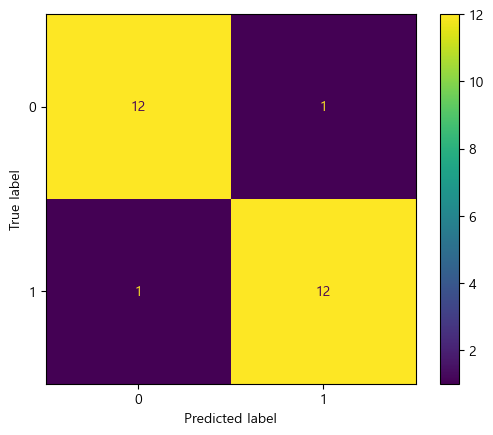


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 0.9519230769230769, 테스트정확도: 0.9615384615384616, 과적합여부: -0.009615384615384692
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


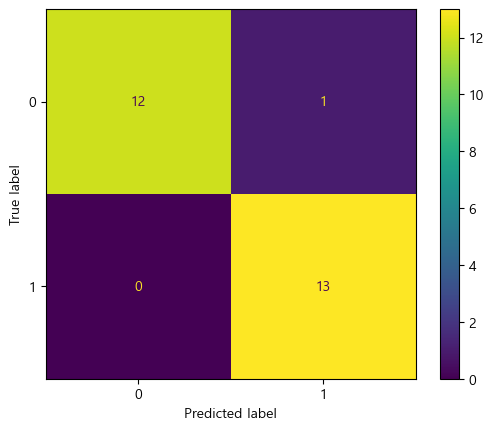


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [8]
예측결과: [0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


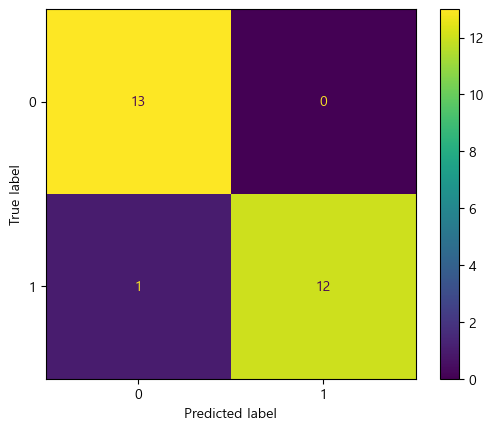

In [30]:
Wine_polymm = classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=2, 
                scaler_type= "minmax",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_polymm)
classification_analysis.train_and_evaluate(Wine_polymm)

### 특성공학, RobustScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9519230769230769, 테스트정확도: 0.9615384615384616, 과적합여부: -0.009615384615384692
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


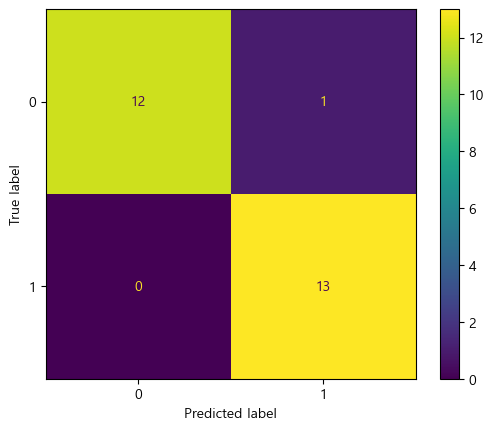


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9615384615384616, 과적합여부: 0.0
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [13]
예측결과: [0 0 0 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630


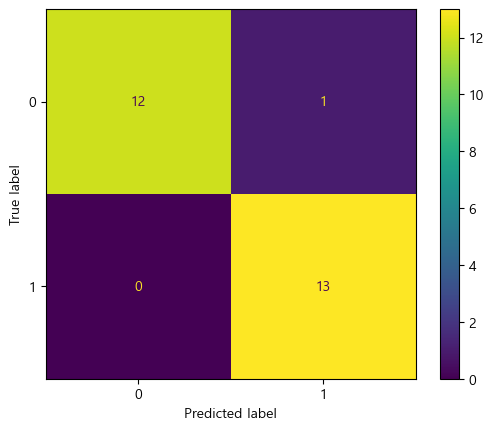


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [8]
예측결과: [0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


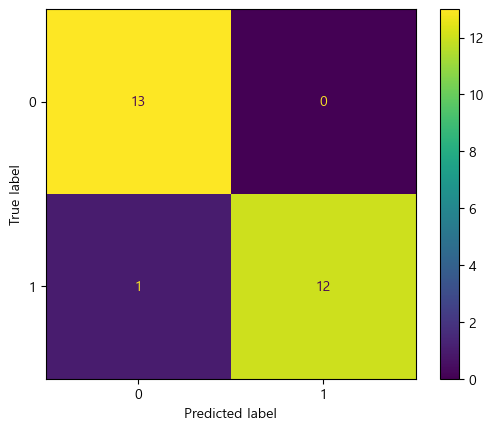

In [31]:
Wine_polyrb = classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target", 
                test_size=0.2,
                random_state=42, 
                poly_degree=2, 
                scaler_type= "robust",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()]
            )

classification_analysis.get_data(Wine_polyrb)
classification_analysis.train_and_evaluate(Wine_polyrb)

### 특성중요도 > 0.5

### 특성, 스케일링 미적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9423076923076923, 테스트정확도: 0.9615384615384616, 과적합여부: -0.019230769230769273
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


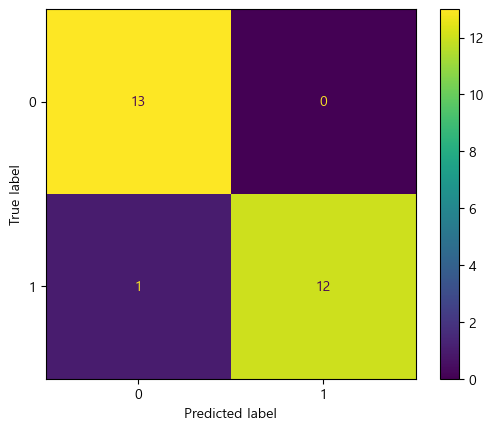


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 1}
훈련정확도: 0.9326923076923077, 테스트정확도: 0.8846153846153846, 과적합여부: 0.04807692307692313
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [1, 10, 13]
예측결과: [0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.8846, 정밀도:0.8571, 재현율:0.9231, f1-score:0.8889


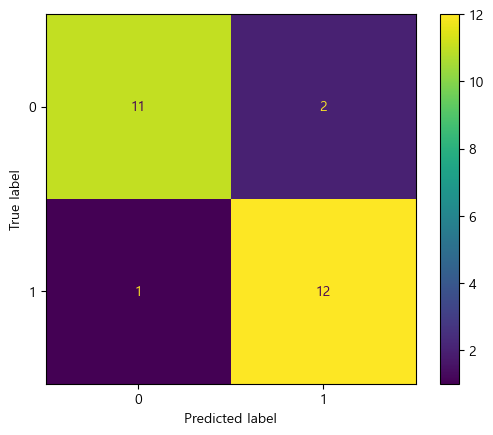


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [10, 13]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231


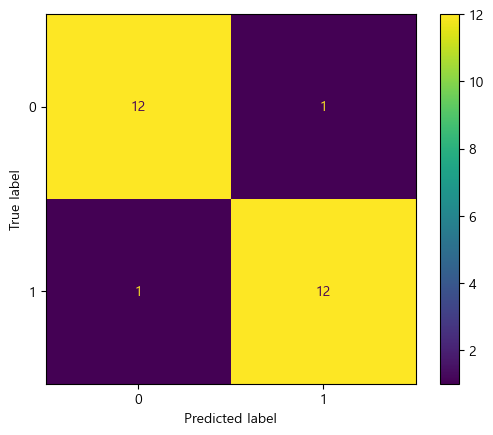

In [32]:
Wine_Noset= classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target",
                test_size=0.2,
                random_state=42, 
                poly_degree=1, 
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()],
                idx=0.5
            )

classification_analysis.get_data(Wine_Noset)
classification_analysis.train_and_evaluate(Wine_Noset)

### 특성공학 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9423076923076923, 테스트정확도: 0.9615384615384616, 과적합여부: -0.019230769230769273
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


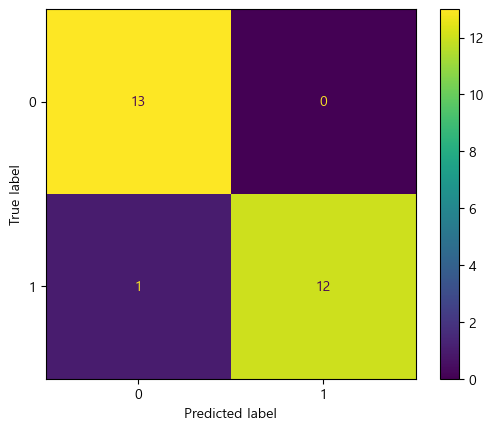


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 1}
훈련정확도: 0.9326923076923077, 테스트정확도: 0.8846153846153846, 과적합여부: 0.04807692307692313
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [1, 10, 13]
예측결과: [0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.8846, 정밀도:0.8571, 재현율:0.9231, f1-score:0.8889


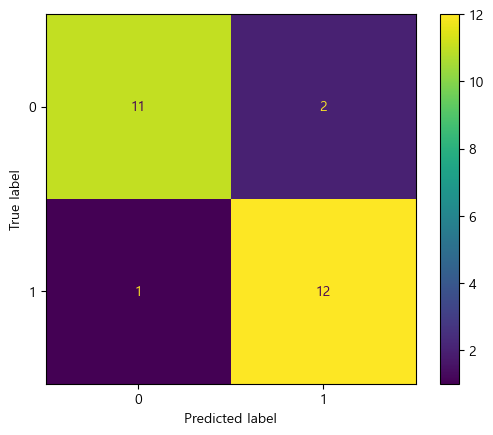


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [10, 13]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231


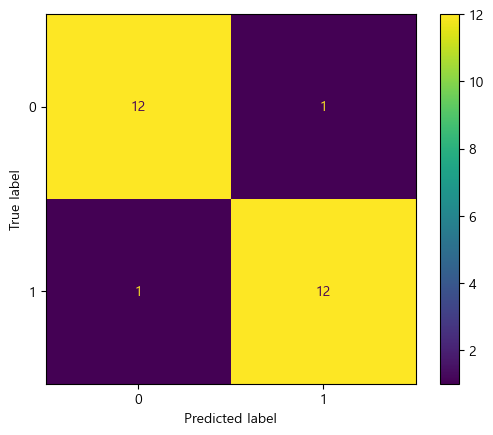

In [33]:
Wine_poly= classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target",
                test_size=0.2,
                random_state=42, 
                poly_degree=2, 
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()],
                idx=0.5
            )

classification_analysis.get_data(Wine_poly)
classification_analysis.train_and_evaluate(Wine_poly)

### StandardScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9423076923076923, 테스트정확도: 0.9615384615384616, 과적합여부: -0.019230769230769273
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


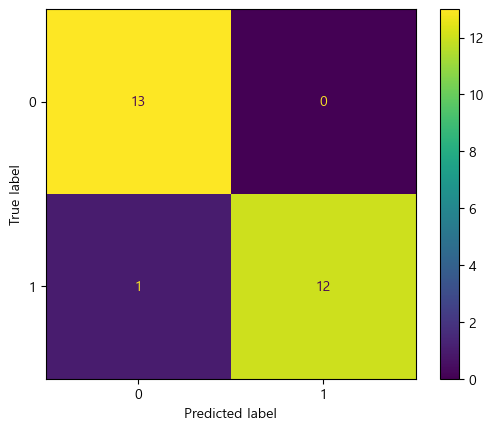


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 1}
훈련정확도: 0.9326923076923077, 테스트정확도: 0.8846153846153846, 과적합여부: 0.04807692307692313
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [1, 10, 13]
예측결과: [0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.8846, 정밀도:0.8571, 재현율:0.9231, f1-score:0.8889


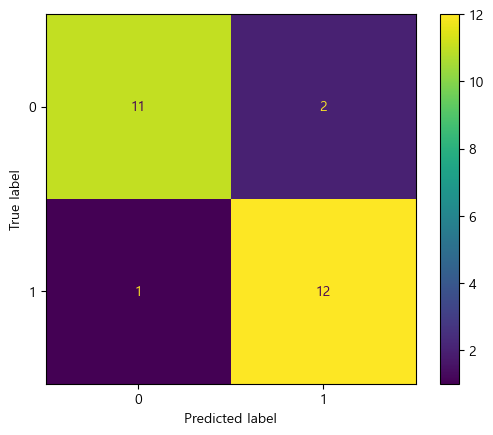


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [10, 13]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231


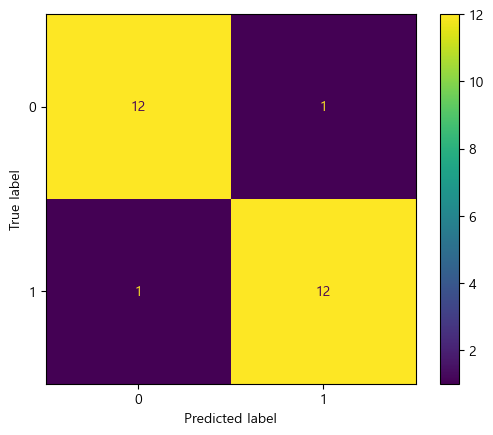

In [34]:
Wine_ss= classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target",
                test_size=0.2,
                random_state=42, 
                poly_degree=1,
                scaler_type= "standard",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()],
                idx=0.5
            )

classification_analysis.get_data(Wine_ss)
classification_analysis.train_and_evaluate(Wine_ss)

### MinmaxScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9423076923076923, 테스트정확도: 0.9615384615384616, 과적합여부: -0.019230769230769273
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


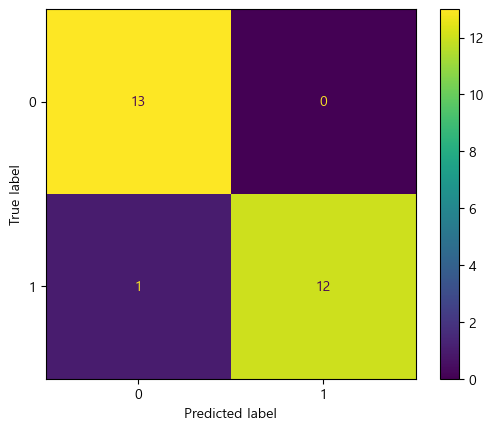


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 0.9326923076923077, 테스트정확도: 0.8846153846153846, 과적합여부: 0.04807692307692313
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [1, 10, 13]
예측결과: [0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.8846, 정밀도:0.8571, 재현율:0.9231, f1-score:0.8889


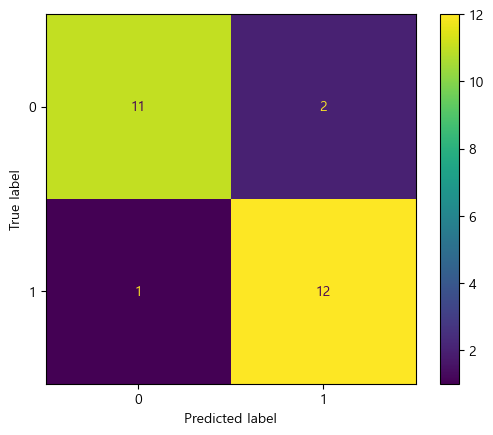


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [10, 13]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231


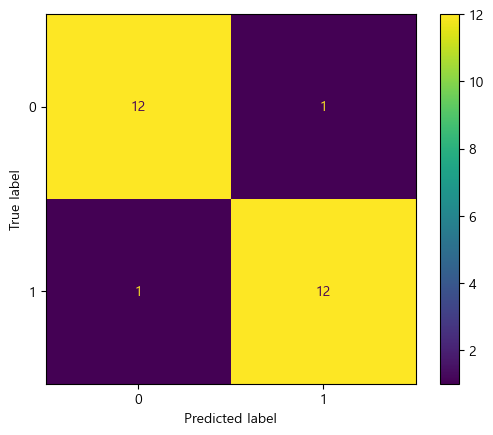

In [35]:
Wine_mm = classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target",
                test_size=0.2,
                random_state=42, 
                poly_degree=1,
                scaler_type= "minmax",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()],
                idx=0.5
            )

classification_analysis.get_data(Wine_mm)
classification_analysis.train_and_evaluate(Wine_mm)

### RobustScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9423076923076923, 테스트정확도: 0.9615384615384616, 과적합여부: -0.019230769230769273
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


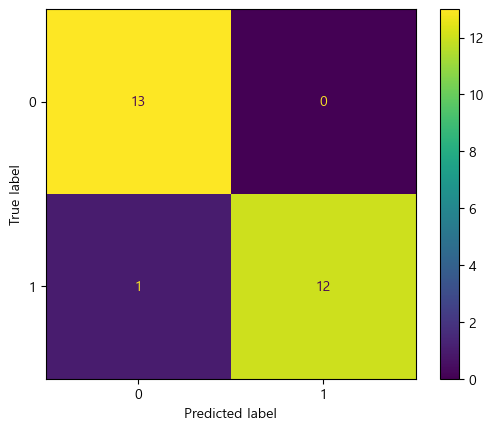


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 1}
훈련정확도: 0.9326923076923077, 테스트정확도: 0.8846153846153846, 과적합여부: 0.04807692307692313
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [1, 10, 13]
예측결과: [0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.8846, 정밀도:0.8571, 재현율:0.9231, f1-score:0.8889


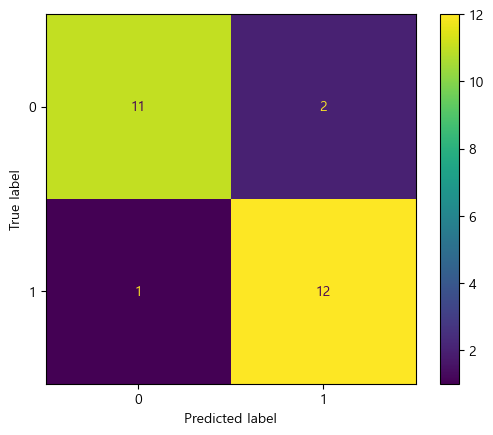


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [10, 13]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231


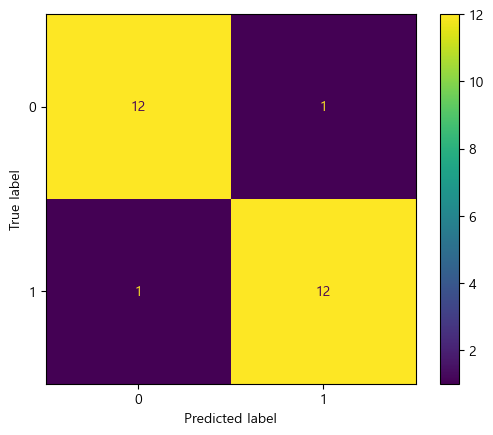

In [36]:
Wine_rb = classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target",
                test_size=0.2,
                random_state=42, 
                poly_degree=1,
                scaler_type= "robust",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()],
                idx=0.5
            )

classification_analysis.get_data(Wine_rb)
classification_analysis.train_and_evaluate(Wine_rb)

### 특성공학, StandardScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9423076923076923, 테스트정확도: 0.9615384615384616, 과적합여부: -0.019230769230769273
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


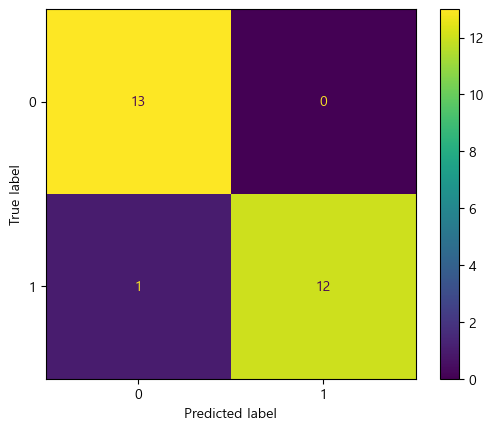


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 1}
훈련정확도: 0.9326923076923077, 테스트정확도: 0.8846153846153846, 과적합여부: 0.04807692307692313
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [1, 10, 13]
예측결과: [0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.8846, 정밀도:0.8571, 재현율:0.9231, f1-score:0.8889


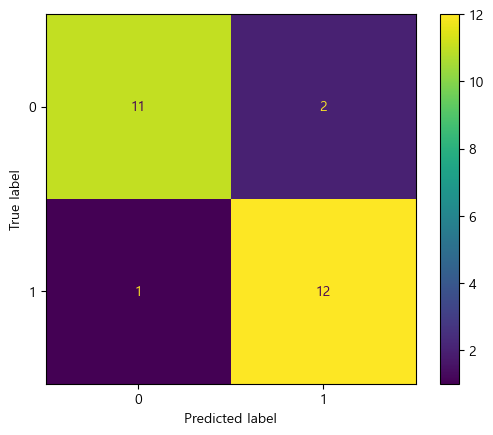


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [10, 13]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231


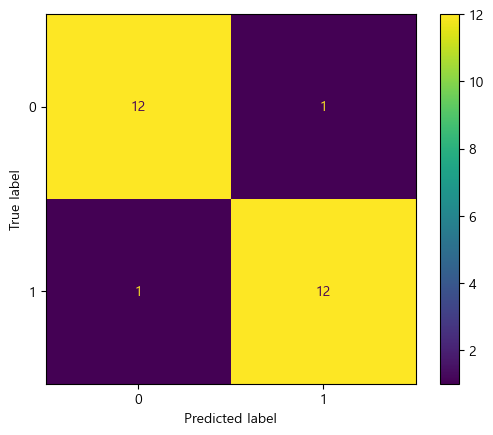

In [37]:
Wine_polyss = classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target",
                test_size=0.2,
                random_state=42, 
                poly_degree=2,
                scaler_type= "standard",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()],
                idx=0.5
            )

classification_analysis.get_data(Wine_polyss)
classification_analysis.train_and_evaluate(Wine_polyss)

### 특성공학, MinmaxScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9423076923076923, 테스트정확도: 0.9615384615384616, 과적합여부: -0.019230769230769273
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


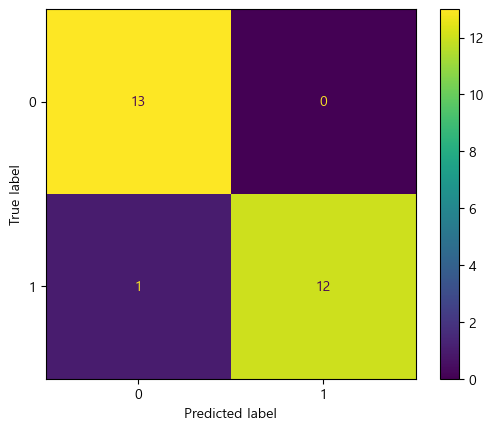


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 10}
훈련정확도: 0.9326923076923077, 테스트정확도: 0.8846153846153846, 과적합여부: 0.04807692307692313
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [1, 10, 13]
예측결과: [0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.8846, 정밀도:0.8571, 재현율:0.9231, f1-score:0.8889


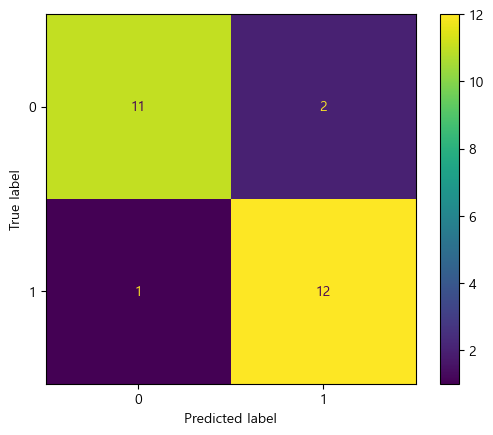


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [10, 13]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231


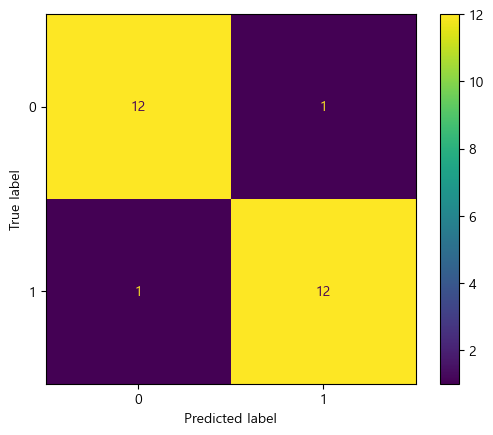

In [38]:
Wine_polymm = classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target",
                test_size=0.2,
                random_state=42, 
                poly_degree=2,
                scaler_type= "minmax",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()],
                idx=0.5
            )

classification_analysis.get_data(Wine_polymm)
classification_analysis.train_and_evaluate(Wine_polymm)

### 특성공학, RobustScaler 적용

모델: KNeighborsClassifier
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'n_neighbors': 5}
훈련정확도: 0.9423076923076923, 테스트정확도: 0.9615384615384616, 과적합여부: -0.019230769230769273
과소적합이 발생하였습니다.
예측에 실패한 인덱스: [10]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9615, 정밀도:1.0000, 재현율:0.9231, f1-score:0.9600


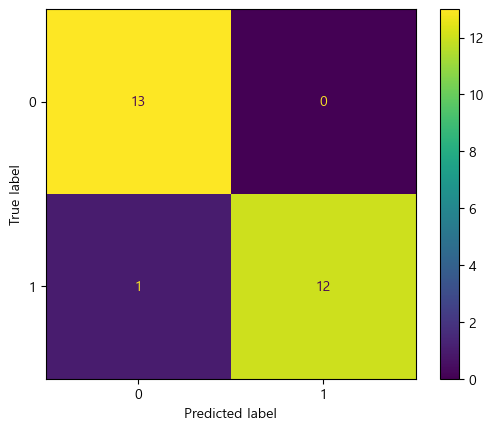


모델: LogisticRegression
Fitting 5 folds for each of 4 candidates, totalling 20 fits
최적 파라미터: {'C': 1}
훈련정확도: 0.9326923076923077, 테스트정확도: 0.8846153846153846, 과적합여부: 0.04807692307692313
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [1, 10, 13]
예측결과: [0 1 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.8846, 정밀도:0.8571, 재현율:0.9231, f1-score:0.8889


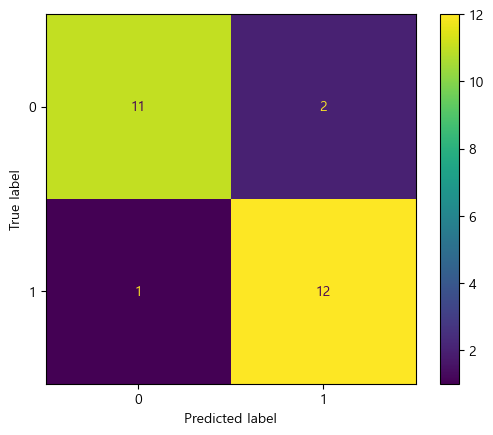


모델: DecisionTreeClassifier
Fitting 5 folds for each of 36 candidates, totalling 180 fits
최적 파라미터: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
사용가능한 과적합 상태입니다.
예측에 실패한 인덱스: [10, 13]
예측결과: [0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0]
실제정답: [0 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 0]
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231


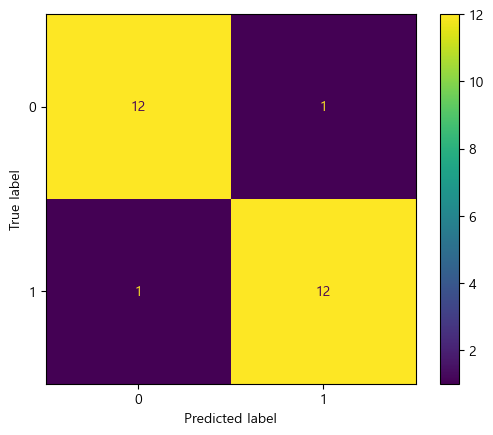

In [39]:
Wine_polyrb = classification_analysis_feature(
                data=wine_df_filtered, 
                target_column="target",
                test_size=0.2,
                random_state=42, 
                poly_degree=2,
                scaler_type= "robust",
                models=[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier()],
                idx=0.5
            )

classification_analysis.get_data(Wine_polyrb)
classification_analysis.train_and_evaluate(Wine_polyrb)

In [40]:
"""
[특성중요도 제거 전]
*특성, 스케일링 미적용
 - 모델: DecisionTreeClassifier
 - 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
 - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630

*특성공학 적용
 - 모델: DecisionTreeClassifier
 - 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
 - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630

*StandardScaler 적용
 - 모든 모델 과소 적합

*MinmaxScaler 적용
 - KNeighborsClassifier, LogisticRegression 모델은 과소 적합으로 사용 불가하다고 판단.
 - DecisionTreeClassifier 훈련정확도가 1로 사용 불가하다고 판단.

*RobustScaler 적용
 - 모델: DecisionTreeClassifier
 - 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
 - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630

* 특성공학, StandardScaler 적용
 - 모델: DecisionTreeClassifier
 - 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
 - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630

* 특성공학, MinmaxScaler 적용
 - 모델: KNeighborsClassifier
 - 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9230769230769231, 과적합여부: 0.06730769230769229
 - 정확도:0.9231, 정밀도:1.0000, 재현율:0.8462, f1-score:0.9167

* 특성공학, RobustScaler 적용
 - 모델: DecisionTreeClassifier
 - 훈련정확도: 1.0, 테스트정확도: 0.9615384615384616, 과적합여부: 0.038461538461538436
 - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630
 
----------------------------------------------------------------------------------------------------------
BEST MODEL 
* 특성공학, StandardScaler 적용
 - 모델: DecisionTreeClassifier
 - 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
 - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630

==========================================================================================================
[특성중요도 > 0.1]
*특성, 스케일링 미적용
 - KNeighborsClassifier, LogisticRegression 모델은 과소 적합으로 사용 불가하다고 판단.
 - DecisionTreeClassifier 훈련정확도가 1로 사용 불가하다고 판단.

*특성공학 적용
 - 모든 모델 과소 적합

*StandardScaler 적용
 - KNeighborsClassifier, LogisticRegression 모델은 과소 적합으로 사용 불가하다고 판단.
 - DecisionTreeClassifier 훈련정확도가 1로 사용 불가하다고 판단.

*MinmaxScaler 적용
 - 모델: KNeighborsClassifier
 - 훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
 - 정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231

*RobustScaler 적용
 - KNeighborsClassifier, LogisticRegression 모델은 과소 적합으로 사용 불가하다고 판단.
 - DecisionTreeClassifier 훈련정확도가 1로 사용 불가하다고 판단.

* 특성공학, StandardScaler 적용
 - KNeighborsClassifier, LogisticRegression 모델은 과소 적합으로 사용 불가하다고 판단.
 - DecisionTreeClassifier 훈련정확도가 1로 사용 불가하다고 판단.

* 특성공학, MinmaxScaler 적용
 - 모델: KNeighborsClassifier
 - 훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
 - 정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231

* 특성공학, RobustScaler 적용
 - KNeighborsClassifier, LogisticRegression 모델은 과소 적합으로 사용 불가하다고 판단.
 - DecisionTreeClassifier 훈련정확도가 1로 사용 불가하다고 판단.

----------------------------------------------------------------------------------------------------------
BEST MODEL 
* 특성공학, MinmaxScaler 적용
 - 모델: KNeighborsClassifier
 - 훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
 - 정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231
 
==========================================================================================================
[특성중요도 > 0.5]
*특성, 스케일링 미적용
 모델: DecisionTreeClassifier
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231

*특성공학 적용
모델: DecisionTreeClassifier
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231

*StandardScaler 적용
모델: DecisionTreeClassifier
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231

*MinmaxScaler 적용
모델: DecisionTreeClassifier
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231

*RobustScaler 적용
모델: DecisionTreeClassifier
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231

* 특성공학, StandardScaler 적용
모델: DecisionTreeClassifier
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231

* 특성공학, MinmaxScaler 적용
모델: DecisionTreeClassifier
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231

* 특성공학, RobustScaler 적용
모델: DecisionTreeClassifier
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231

----------------------------------------------------------------------------------------------------------
BEST MODEL 
* 특성공학, StandardScaler 적용
모델: DecisionTreeClassifier
훈련정확도: 0.9615384615384616, 테스트정확도: 0.9230769230769231, 과적합여부: 0.038461538461538436
정확도:0.9231, 정밀도:0.9231, 재현율:0.9231, f1-score:0.9231

==========================================================================================================
FINAL BEST MODEL
(모든 특성 적용 모델)
* 특성공학, StandardScaler 적용
 - 모델: DecisionTreeClassifier
 - 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855
 - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630
"""

'\n[특성중요도 제거 전]\n*특성, 스케일링 미적용\n - 모델: DecisionTreeClassifier\n - 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855\n - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630\n\n*특성공학 적용\n - 모델: DecisionTreeClassifier\n - 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855\n - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630\n\n*StandardScaler 적용\n - 모든 모델 과소 적합\n\n*MinmaxScaler 적용\n - KNeighborsClassifier, LogisticRegression 모델은 과소 적합으로 사용 불가하다고 판단.\n - DecisionTreeClassifier 훈련정확도가 1로 사용 불가하다고 판단.\n\n*RobustScaler 적용\n - 모델: DecisionTreeClassifier\n - 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855\n - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630\n\n* 특성공학, StandardScaler 적용\n - 모델: DecisionTreeClassifier\n - 훈련정확도: 0.9903846153846154, 테스트정확도: 0.9615384615384616, 과적합여부: 0.028846153846153855\n - 정확도:0.9615, 정밀도:0.9286, 재현율:1.0000, f1-score:0.9630\n\n* 특성공학, MinmaxScaler 적용\n - 모델:

In [ ]:
"""
<최종 모델 선정>
특성공학, StandardScaler 적용한 DecisionTreeClassifier 모델이 가장 좋은 성능을 보였습니다. 
훈련 정확도는 99%에 달하고, 테스트 정확도는 96%로 매우 우수한 성능을 나타냈습니다.
정확도 96.15%, 정밀도 92.86%, 재현율 100%, F1-score 96.30으로, 이 모델은 전반적으로 좋은 결과를 보입니다.

<결론>
DecisionTreeClassifier 모델이 가장 안정적이고 성능이 뛰어난 선택으로 보입니다.
특히, 특성공학과 StandardScaler 적용 시 모델이 최적의 성능을 보였으며, 과적합도 적고 테스트 정확도도 높은 수준을 유지했습니다.
KNeighborsClassifier는 특성중요도 > 0.1에서 성능이 좋았지만, DecisionTreeClassifier에 비해 과적합 우려나 훈련 정확도가 낮은 경향이 보였습니다.

**DecisionTreeClassifier**는 전반적으로 매우 좋은 성능을 보였고, 
**특성공학과 StandardScaler**를 적용한 모델이 최상의 결과를 도출한 것으로 보입니다. 
이 모델을 최종 선택 모델로 두는 것이 합리적이라고 생각합니다.
"""